# AIN 214 - PA4 - 2023
## Building kNN and Logistic Regression Classifiers


# THE STUDENT INFO
## Student Name: Alperen Demirci   
## Student ID: 2220765010

# Dataset: We will use the Breast Cancer Wisconsin (Diagnostic) Dataset available on Kaggle for the assignment. 
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## 1. Data Preprocessing

In this section, you will:
- Import necessary libraries
- Load the dataset
- Handle missing values and outliers
- Convert non-numeric values to numeric 
- Perform data normalization

### Importing the Necessary Libraries

In [263]:
import pandas
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression



In [264]:
dataset = pandas.read_csv("data.csv")

In [265]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## EDA 
* In this part first I will check for the unnecessary columns.
* Then , I will check every column if it has meaningless value like NaN , null etc.
* After that , I will plot the distributions of features and handle missing or outlier values.
* Finally , I will convert categorical variables (if exists) to numerical data with a conventional transform.

## Normalization
- Addtition to that I will normalize the numerical features and create two different dataframes.
- I'll use these dataframes to compare if the normalization actually works or not.

* Plotting the brief information about features.

In [266]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Dropping Unnecessary Columns
* As you can see from the cell above, we can see that 'Unnamed: 32' column has no extractable information.
* Because of that we will drop it.

In [267]:
# Lets' see if we have information in 'Unnamed: 32' column
dataset['Unnamed: 32'].unique()

array([nan])

In [268]:
# We can drop this column
dataset.drop('Unnamed: 32', axis=1, inplace=True)

In [269]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


* Since we won't use id column in our model , we can drop that column too.

In [270]:
dataset.drop('id', axis=1, inplace=True)

In [271]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Checking for the meaningless values

* In order to do this , first we need to get the numerical and categorical values in a list.

    It would be much easier to work this way.

In [272]:
list_categorical = []
list_numerical = []

for ele in dataset.columns:
    if dataset[ele].dtype == 'object':
        list_categorical.append(ele)
    else:
        list_numerical.append(ele)

In [273]:
list_categorical

['diagnosis']

In [274]:
list_numerical


['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

* Lets' check for the unique values of categorical variables.

In [275]:
for ele in list_categorical:
    print("Column : ",ele," -> Unique Features : ",dataset[ele].unique())

Column :  diagnosis  -> Unique Features :  ['M' 'B']


* Let's do the same thing for numerical values. 

    What I mean from meaningless values in the terms of numerical values is like NaN , null etc.

In [276]:
for i in range(len(list_numerical)):
    ele = list_numerical[i]
    print(i+1,"th Column : ",ele," -> Null or NaN Value Count : ",len(dataset.loc[(dataset[ele].isna()==True) | (dataset[ele].isnull() == True)]))

1 th Column :  radius_mean  -> Null or NaN Value Count :  0
2 th Column :  texture_mean  -> Null or NaN Value Count :  0
3 th Column :  perimeter_mean  -> Null or NaN Value Count :  0
4 th Column :  area_mean  -> Null or NaN Value Count :  0
5 th Column :  smoothness_mean  -> Null or NaN Value Count :  0
6 th Column :  compactness_mean  -> Null or NaN Value Count :  0
7 th Column :  concavity_mean  -> Null or NaN Value Count :  0
8 th Column :  concave points_mean  -> Null or NaN Value Count :  0
9 th Column :  symmetry_mean  -> Null or NaN Value Count :  0
10 th Column :  fractal_dimension_mean  -> Null or NaN Value Count :  0
11 th Column :  radius_se  -> Null or NaN Value Count :  0
12 th Column :  texture_se  -> Null or NaN Value Count :  0
13 th Column :  perimeter_se  -> Null or NaN Value Count :  0
14 th Column :  area_se  -> Null or NaN Value Count :  0
15 th Column :  smoothness_se  -> Null or NaN Value Count :  0
16 th Column :  compactness_se  -> Null or NaN Value Count :  0

* Checking for zero or negative values... But why ?

Sometimes a feature can not be less or equal than 0 but it may include some entries like -1 , -999 , 0 etc.
    
That is because during the data collection, data collector may enter a fixed number to represent null/empty values.

We may not detect this with *info()* or *describe()* functions!


In [277]:
for ele in list_numerical:
    print("Column : ",ele," -> Zero or Negative Valued Features : ",len(dataset.loc[dataset[ele]<=0]))

Column :  radius_mean  -> Zero or Negative Valued Features :  0
Column :  texture_mean  -> Zero or Negative Valued Features :  0
Column :  perimeter_mean  -> Zero or Negative Valued Features :  0
Column :  area_mean  -> Zero or Negative Valued Features :  0
Column :  smoothness_mean  -> Zero or Negative Valued Features :  0
Column :  compactness_mean  -> Zero or Negative Valued Features :  0
Column :  concavity_mean  -> Zero or Negative Valued Features :  13
Column :  concave points_mean  -> Zero or Negative Valued Features :  13
Column :  symmetry_mean  -> Zero or Negative Valued Features :  0
Column :  fractal_dimension_mean  -> Zero or Negative Valued Features :  0
Column :  radius_se  -> Zero or Negative Valued Features :  0
Column :  texture_se  -> Zero or Negative Valued Features :  0
Column :  perimeter_se  -> Zero or Negative Valued Features :  0
Column :  area_se  -> Zero or Negative Valued Features :  0
Column :  smoothness_se  -> Zero or Negative Valued Features :  0
Column 

As you can see, only features realted with concavity have negative or zero values.
Since concavity can be negative we have no problem here.

### Distribution of Features

* We will plot distributions of every feature , scatter graph between target and other features.

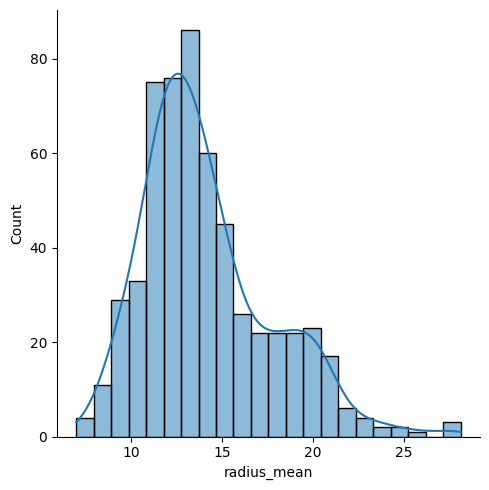

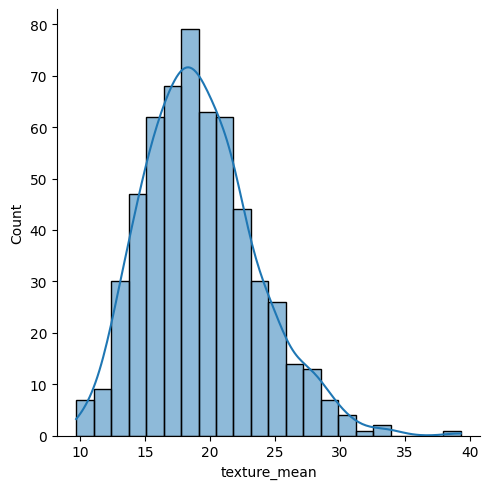

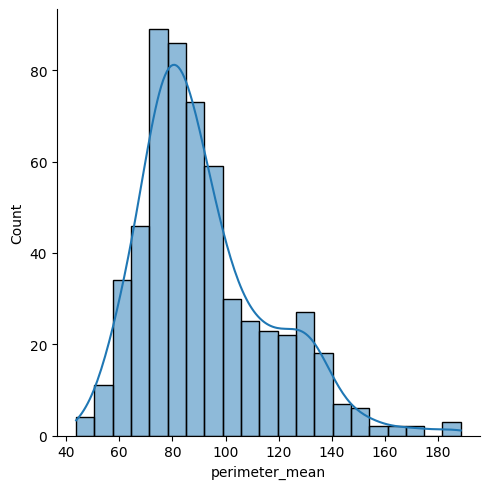

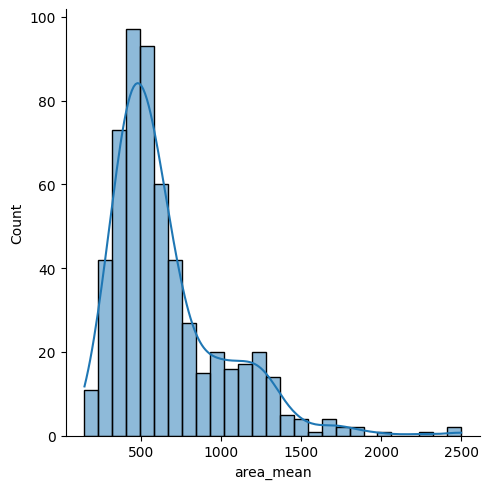

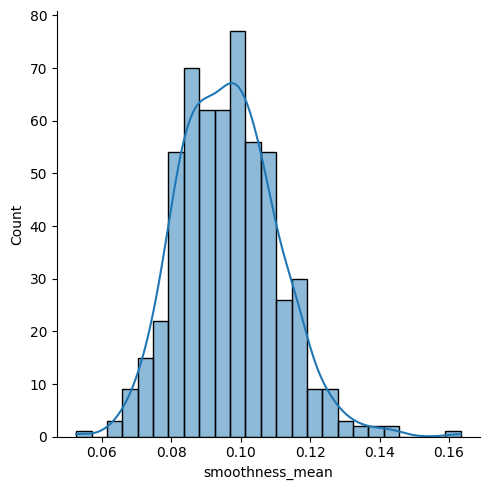

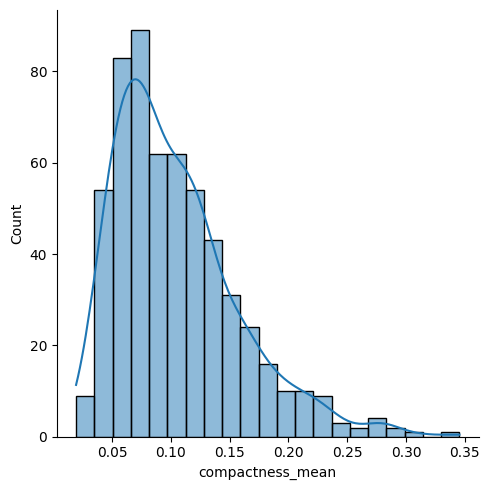

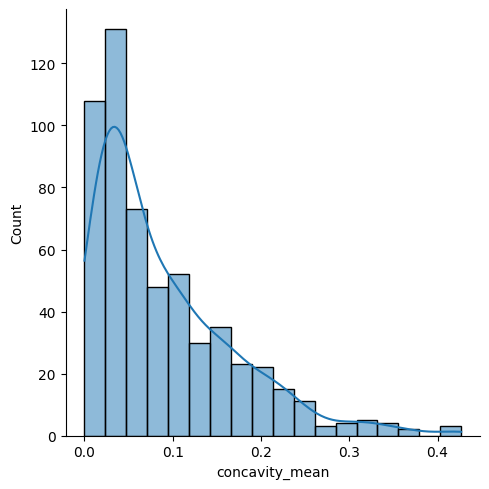

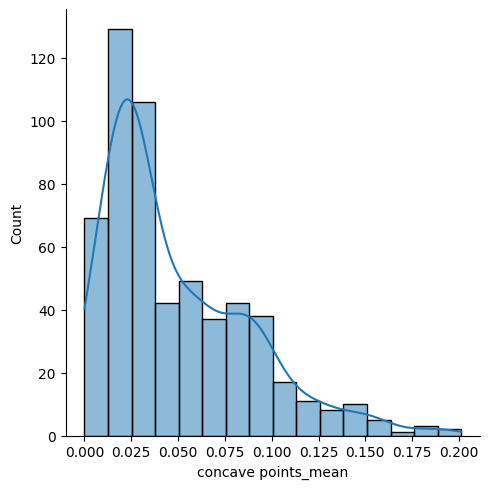

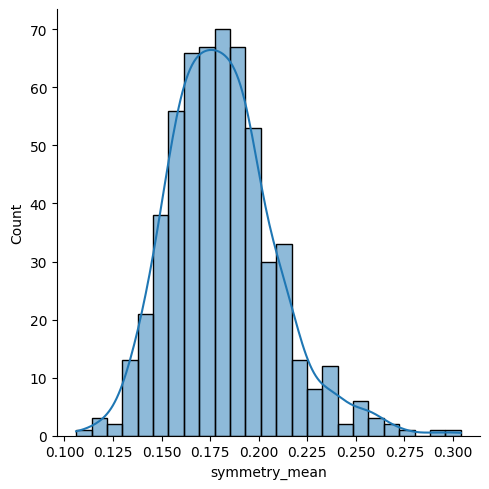

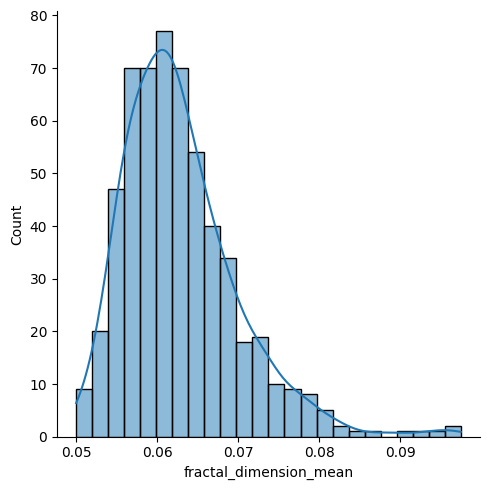

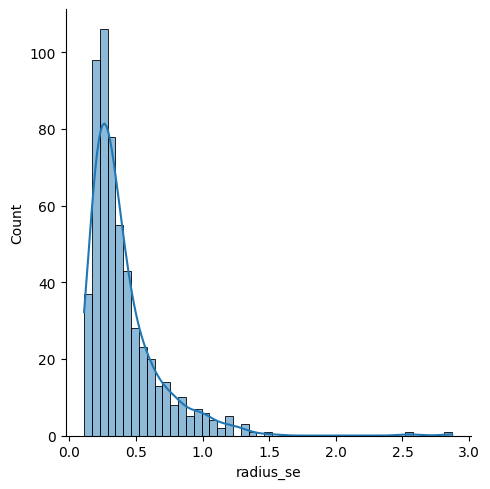

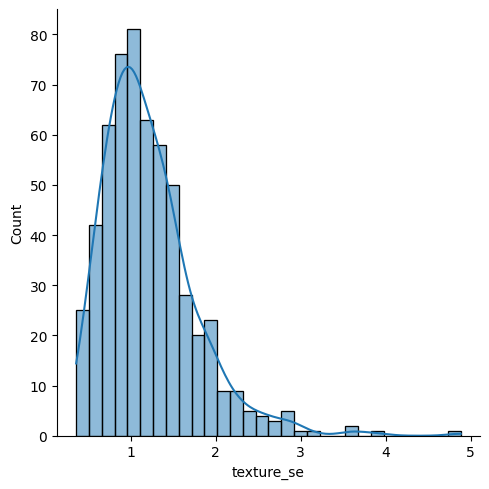

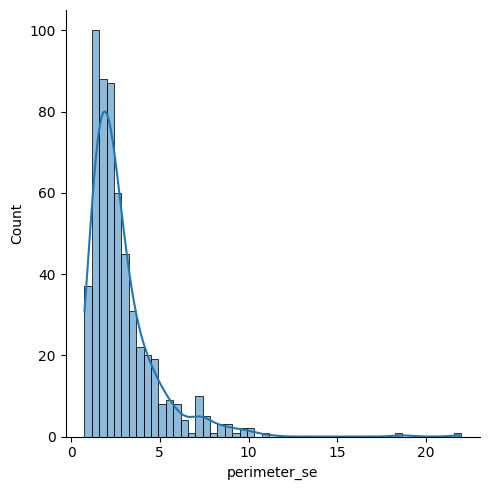

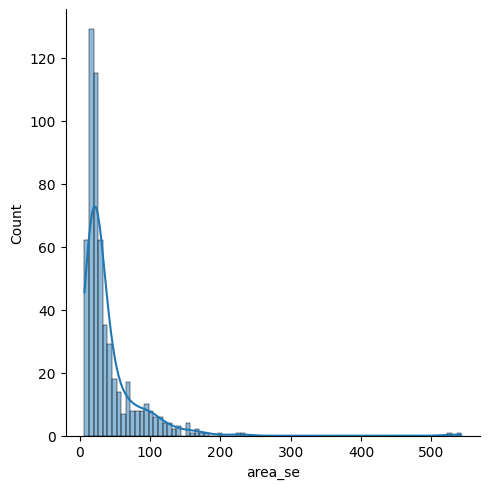

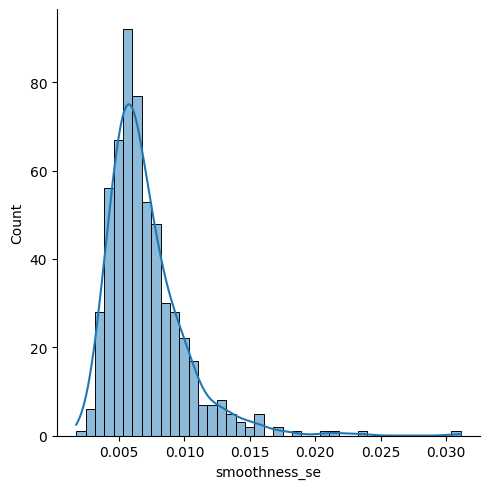

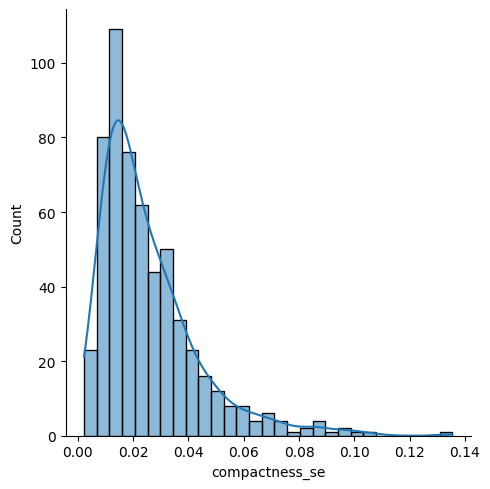

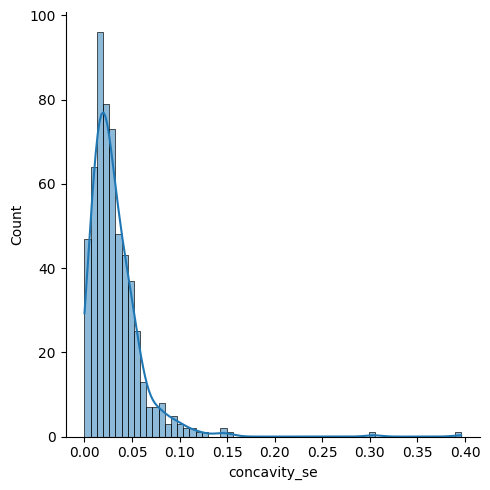

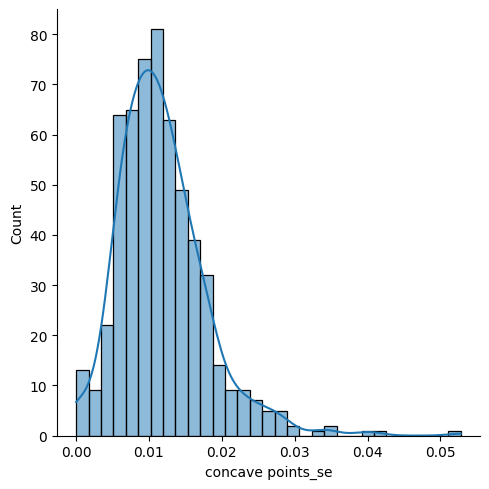

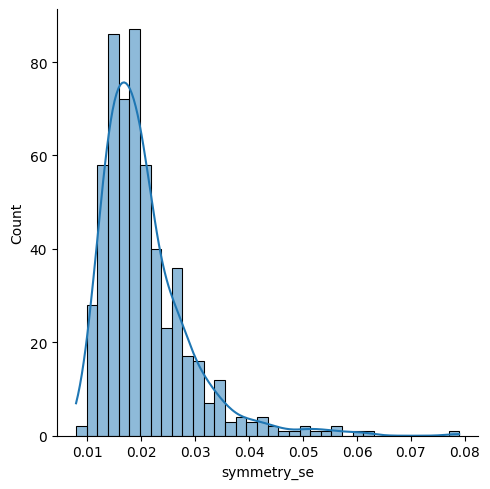

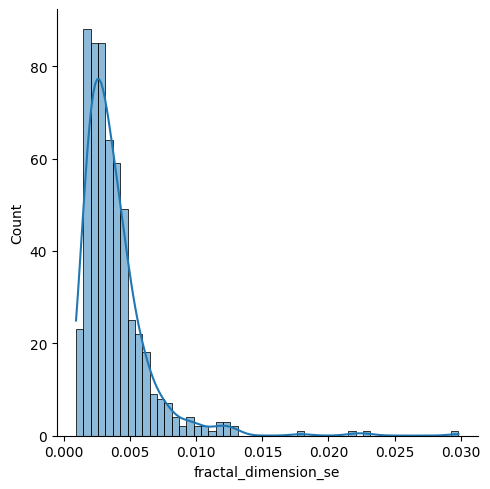

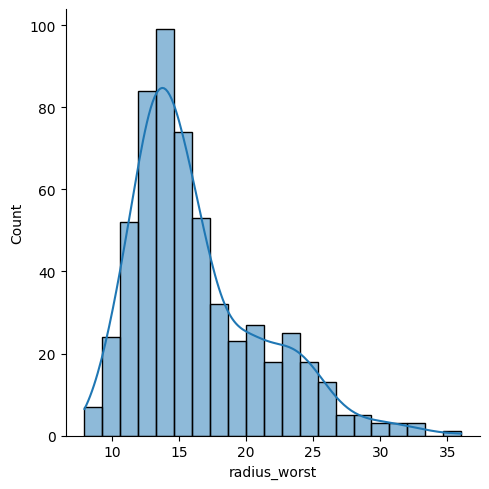

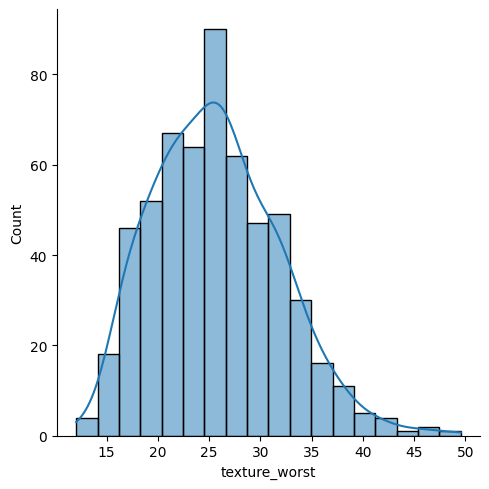

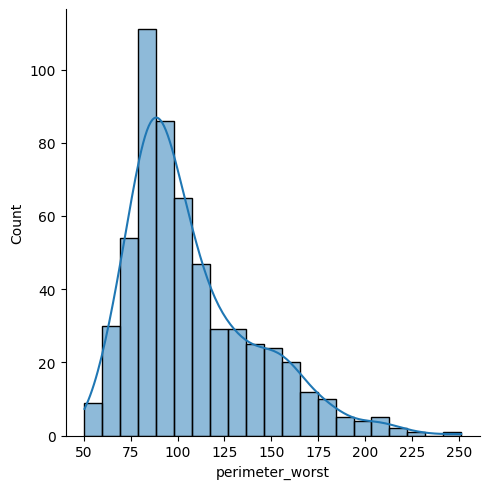

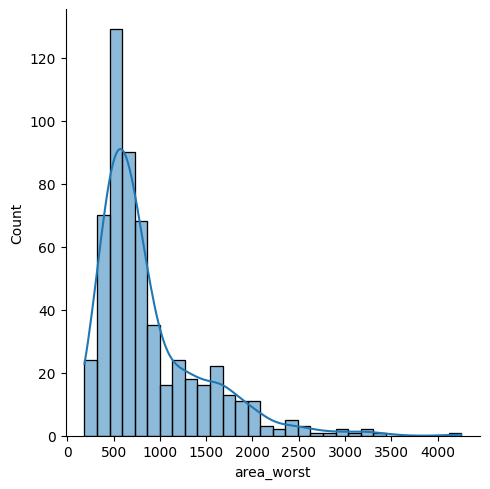

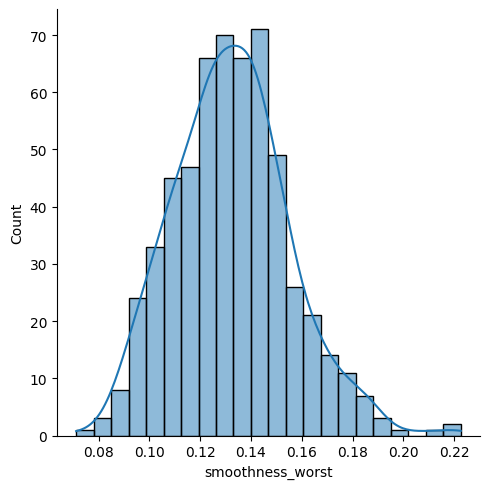

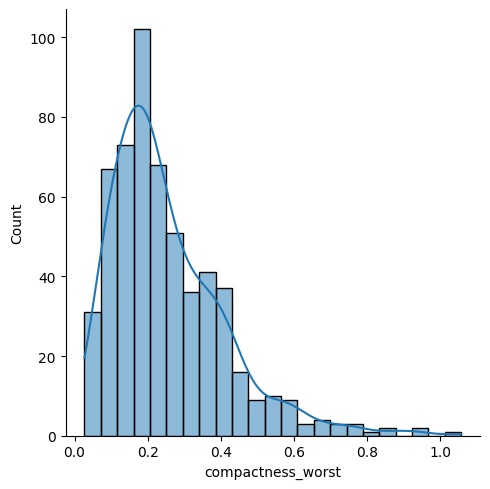

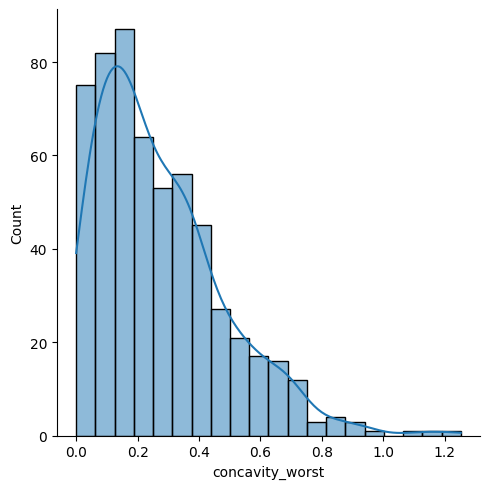

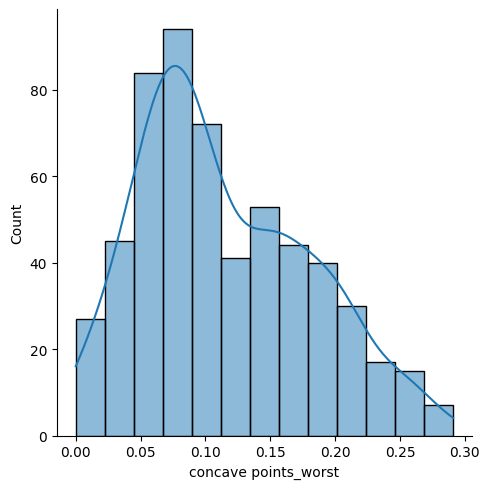

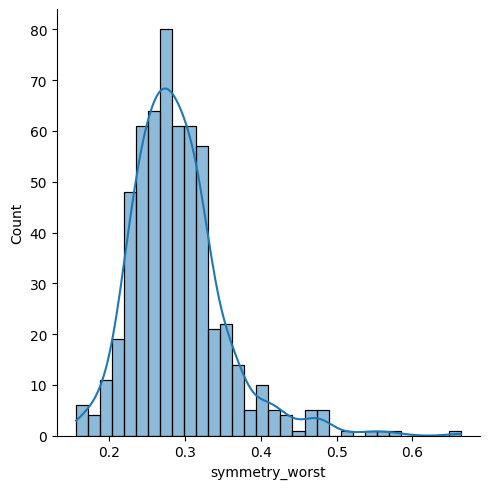

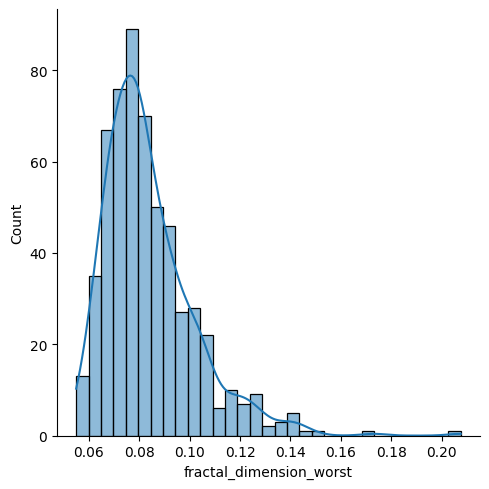

In [235]:
for ele in list_numerical:
    sns.displot(dataset[ele],kde=True)
    plt.show()

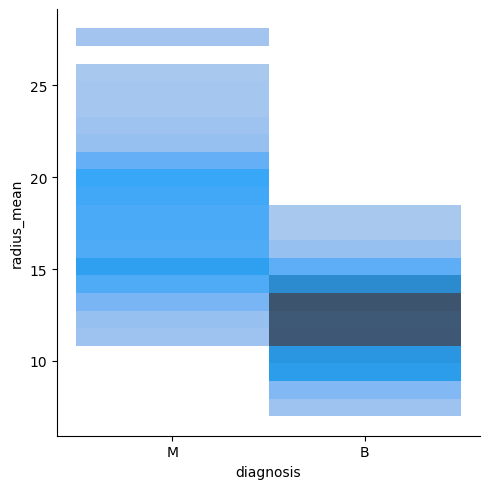

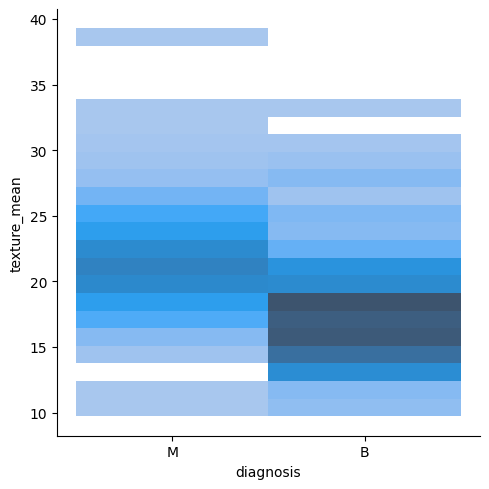

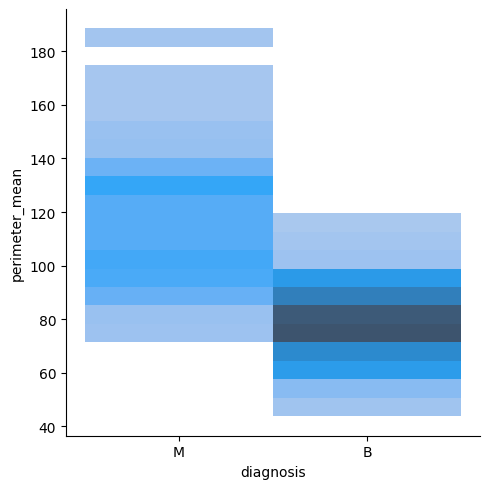

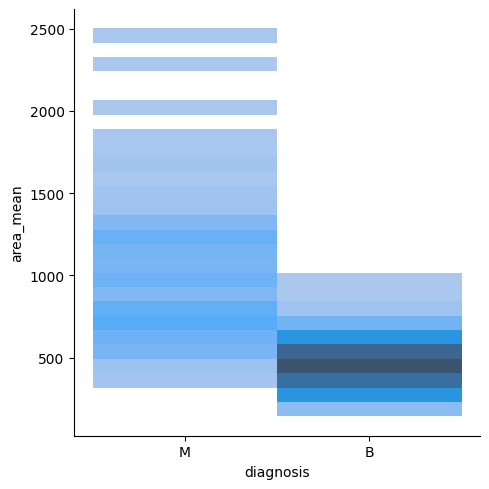

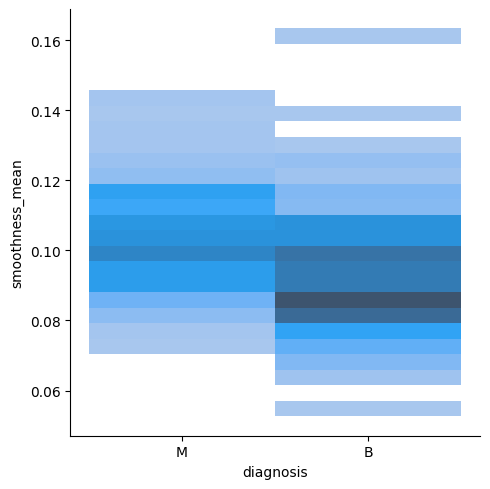

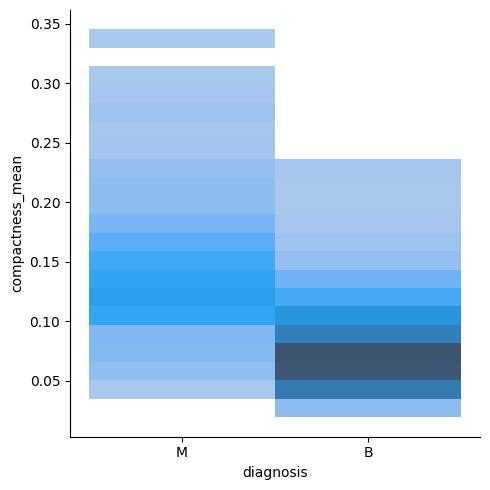

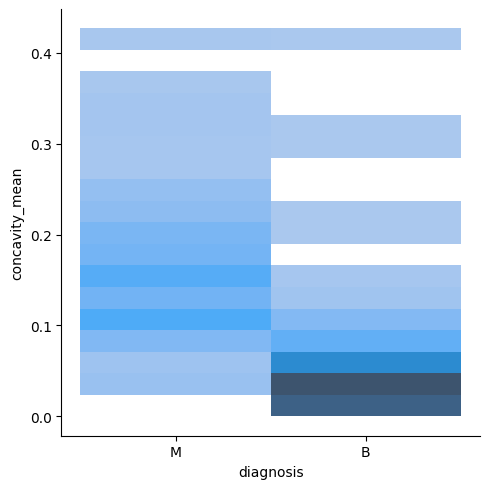

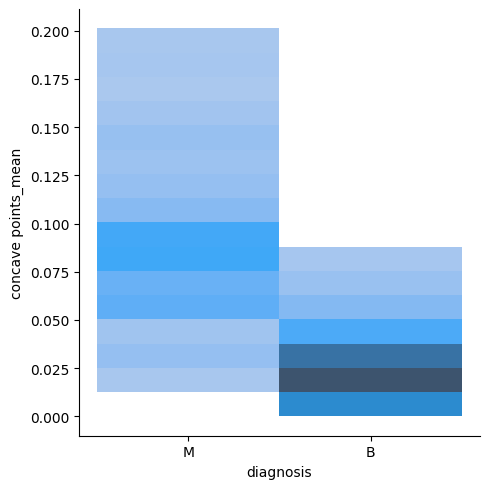

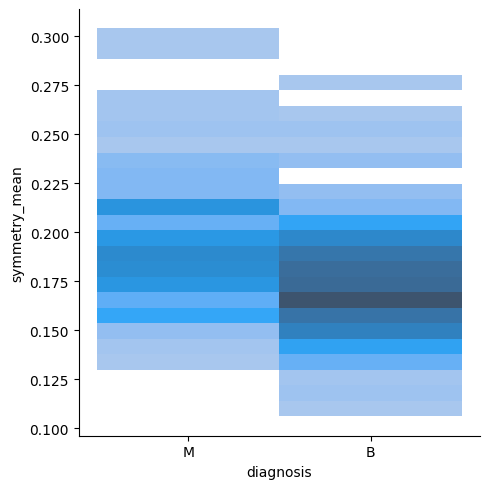

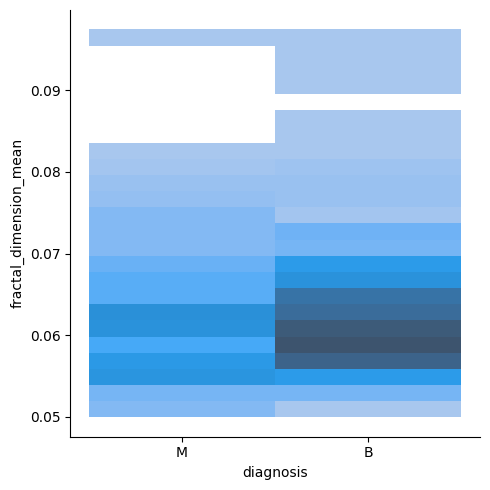

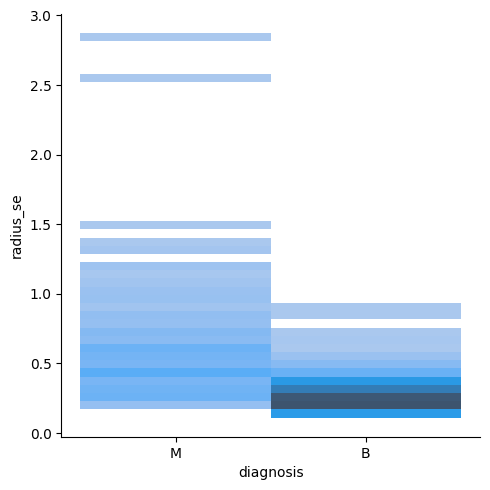

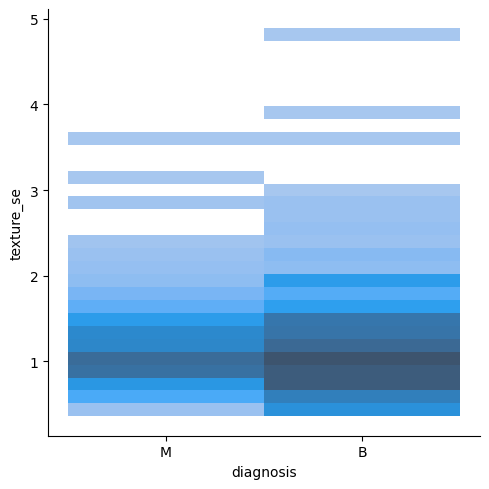

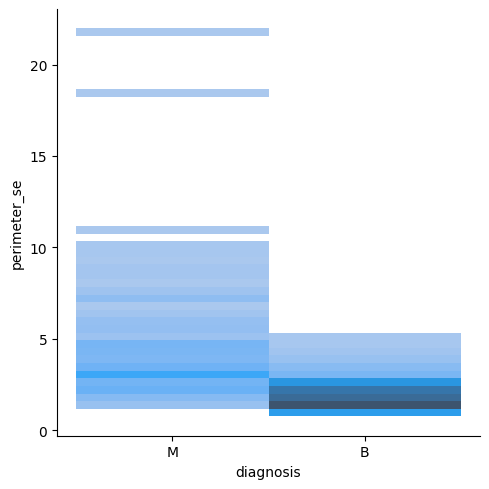

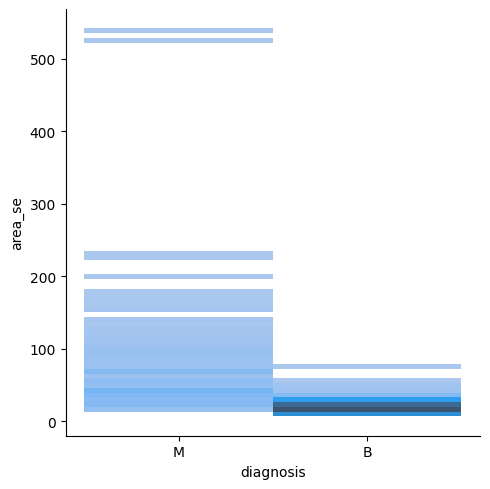

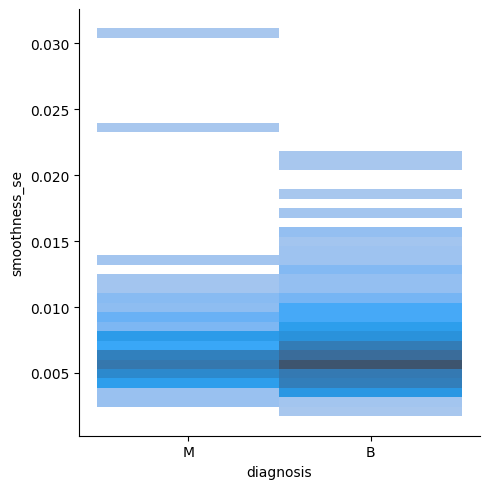

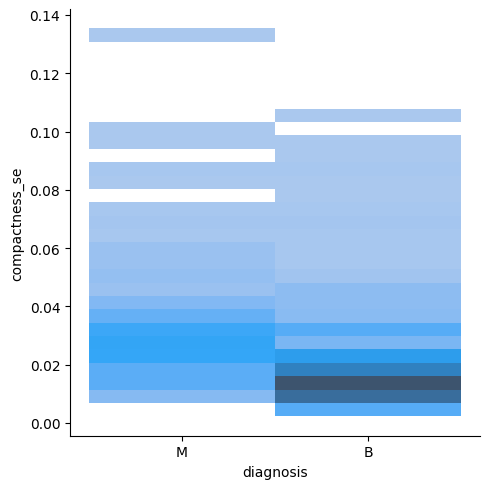

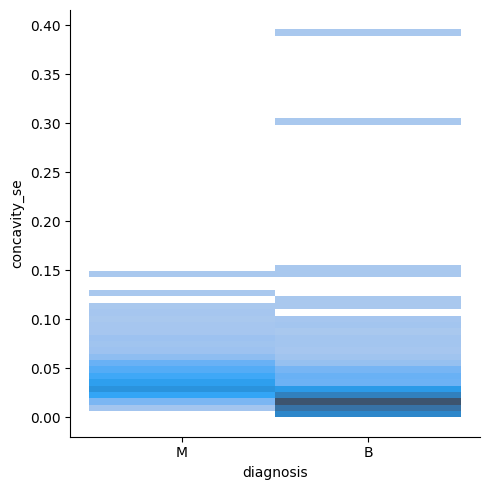

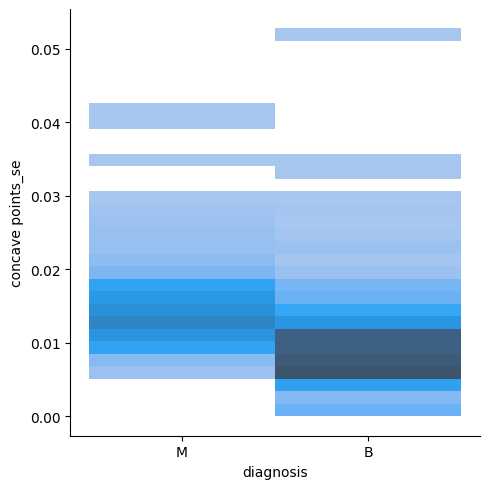

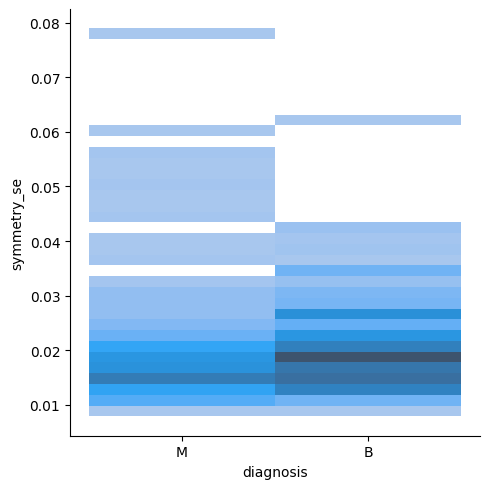

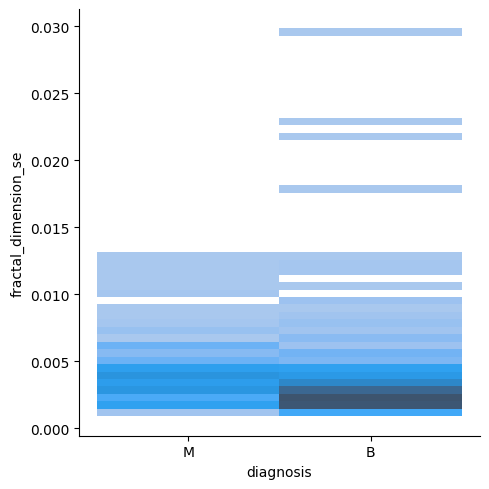

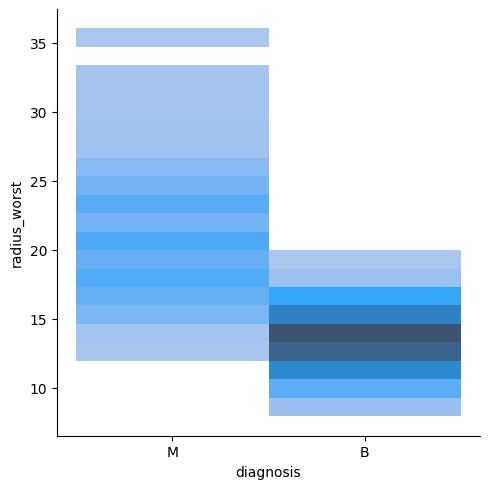

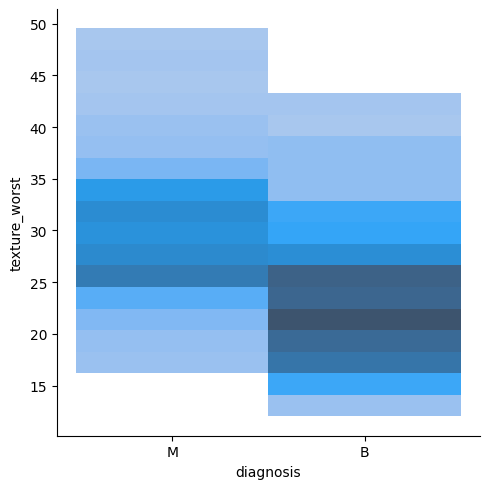

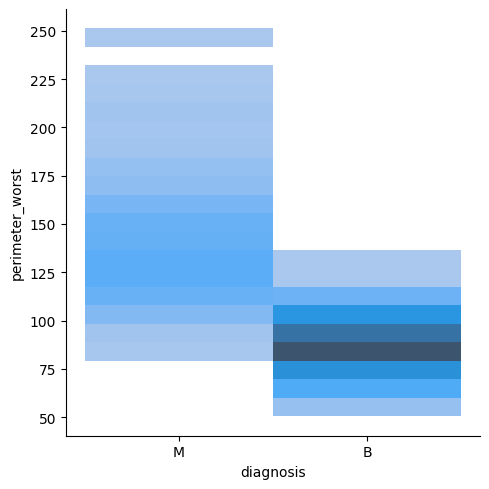

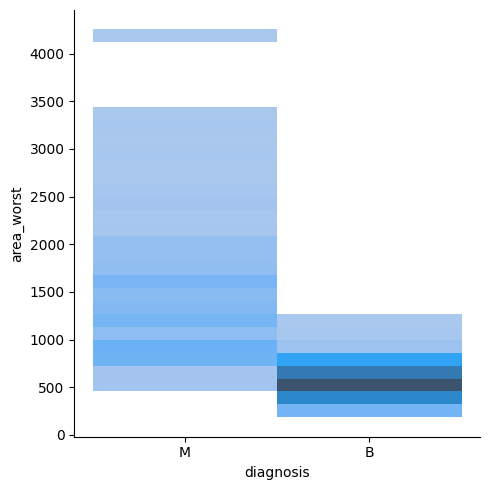

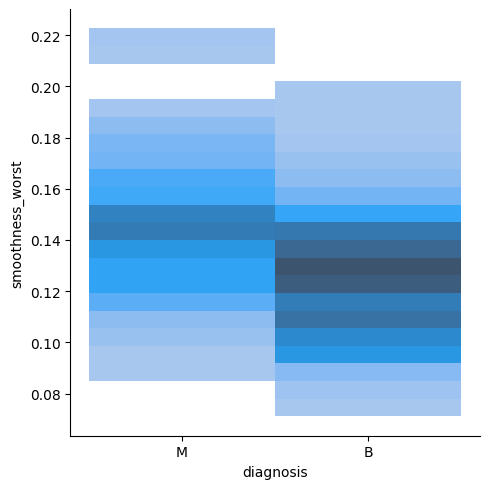

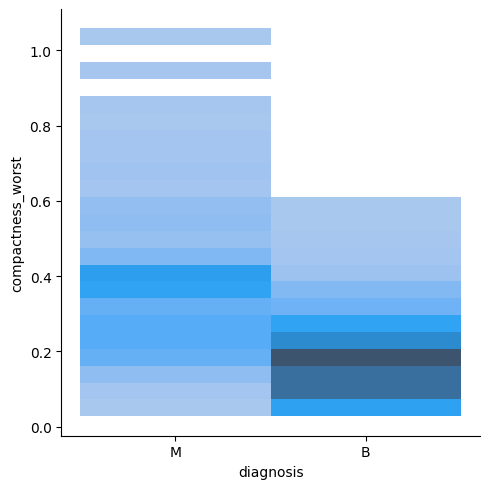

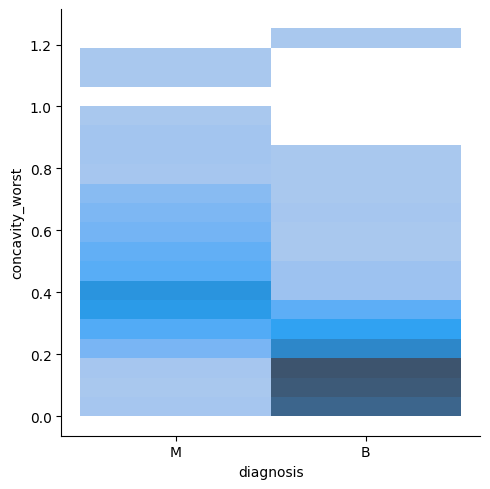

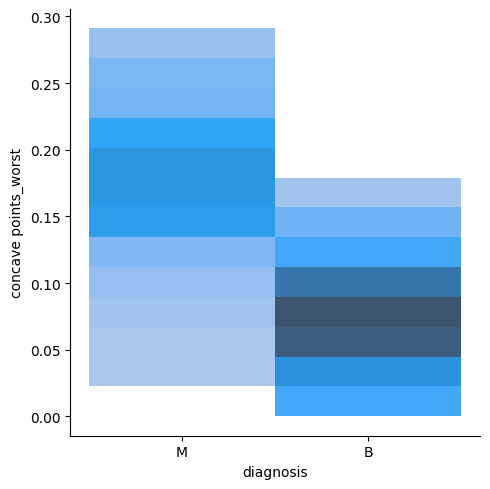

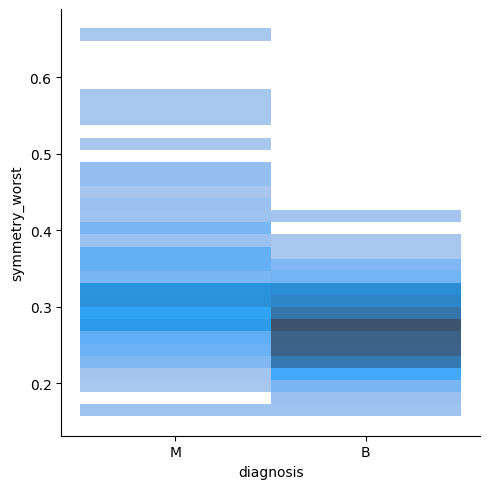

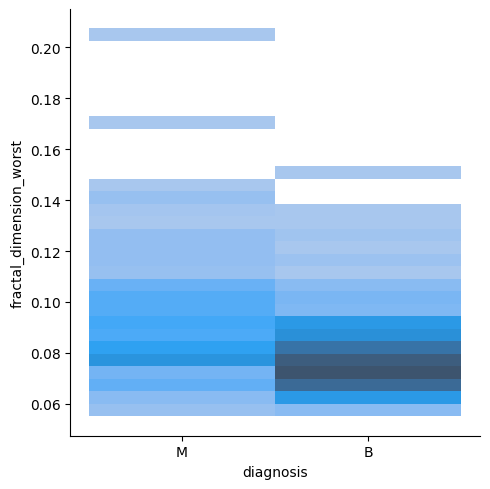

In [236]:
for ele in list_numerical:
    sns.displot(x='diagnosis',y=ele,data=dataset)
    plt.show()
   

* Applying same operations on categorical variables

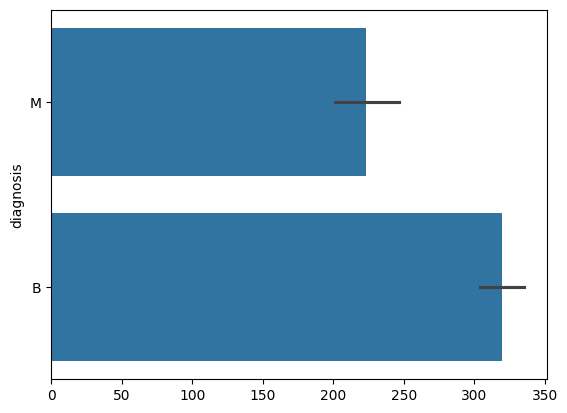

In [237]:
for ele in list_categorical:
    sns.barplot(dataset[ele])
    plt.show()

In [238]:
dataset['diagnosis'].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

## Findings of Data Visualization

### Distributions
1. Most of the features have normal distribution, they don't have many outliers.
2. They are generally right skewed.
3. Only categorical variable is the target variable 'diagnosis'. When we check the distribution of it , we can see that there does not exist an equal divergence between categories. Percentage of 'B' is %62.7 whilst 'M' is %37.2 . This may intend to create a bias towards 'B' since the model will have more sample about it. 
4. From the graphs in the last cell , we can obtain that mean of some features may differ from class to class.(e.g. concave_points_worst, compactness worst)

## Detecting and Handling Outliers

### Outlier Detection Methods
#### IQR 
* This method implies that if our value is out of bounds (mean-1.5IQR,mean+1.5IQR) then it is considered as an outlier.

#### Z-Score  Detection Method 
* This method tells us that if our value is 3 std.s or more from the mean , then it is considered as an outlier.

### I will use the union of these methods in order to be more consise about outlier handling.

## I choose to drop the outliers instead of masking it with median or mean values.


In [239]:
#IQR and Z-Score used together.
total_outlier_cnt_iqr=0
print("Length of the initial dataset : ",len(dataset))
k = 3 #k is the number of standard deviations away from the mean when using Z_Score

for ele in list_numerical:
    q1 = dataset[ele].quantile(0.25)
    q3 = dataset[ele].quantile(0.75)

    iqrange = dataset[ele].quantile(0.75) - dataset[ele].quantile(0.25)

    mean = dataset[ele].mean()
    std = dataset[ele].std()
    
    total_outlier_cnt_iqr+=len(dataset.loc[((dataset[ele] < (q1 - 1.5 * iqrange)) | (dataset[ele] > (q3 + 1.5 * iqrange)) & ((dataset[ele] < (mean - k * std)) | (dataset[ele] > (mean + k * std))))])
    #print("Number of outliers in feature",ele,"based on IQR : ",len(dataset.loc[(dataset[ele] < (Q1 - 1.5 * IQR)) | (dataset[ele] > (Q3 + 1.5 * IQR)),ele]))
    dataset = dataset.loc[(dataset[ele] > (q1 - 1.5 * iqrange)) & (dataset[ele] < (q3 + 1.5 * iqrange)) | (dataset[ele] > (mean - k * std)) & (dataset[ele] < (mean + k * std))]
print(total_outlier_cnt_iqr)
print("Length of the dataset after outlier dropping : ",len(dataset))

Length of the initial dataset :  569
143
Length of the dataset after outlier dropping :  427


* Checking the distributions of the features ...

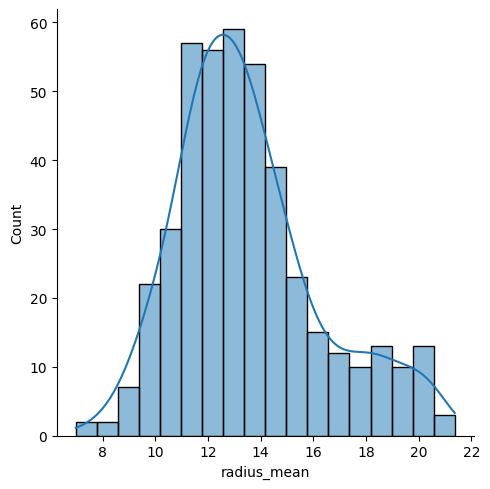

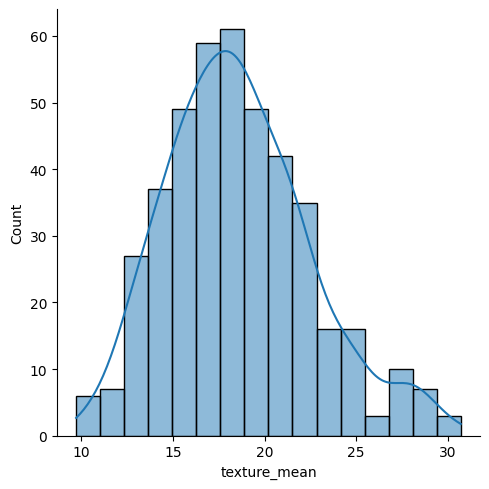

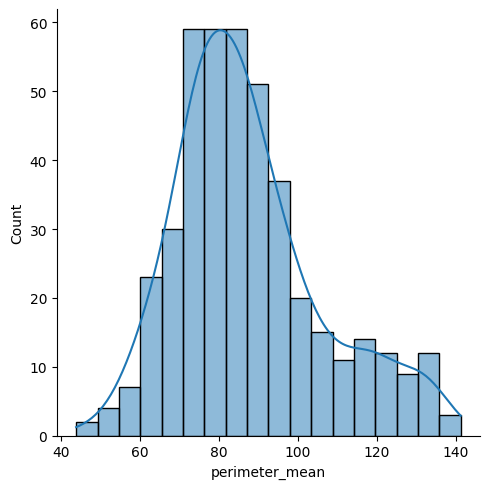

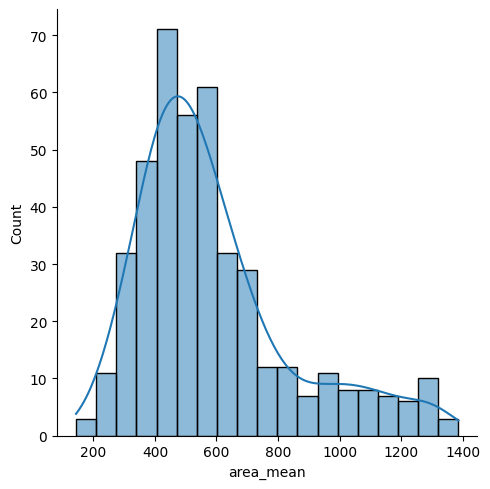

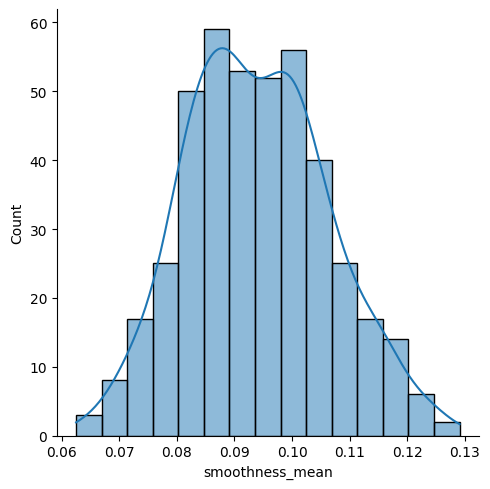

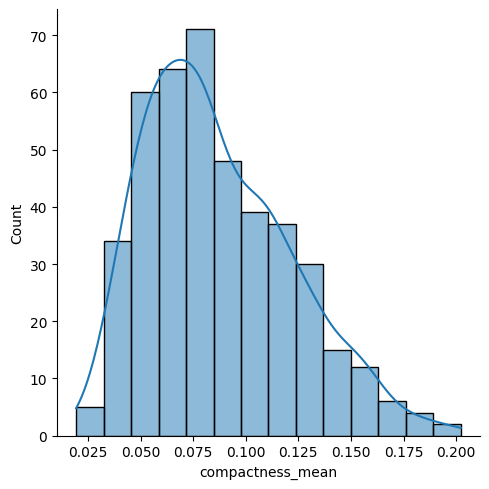

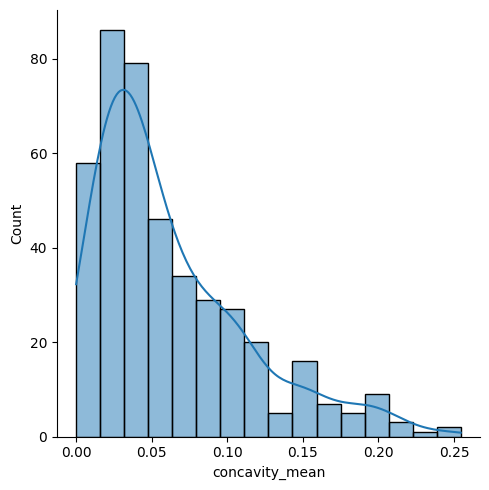

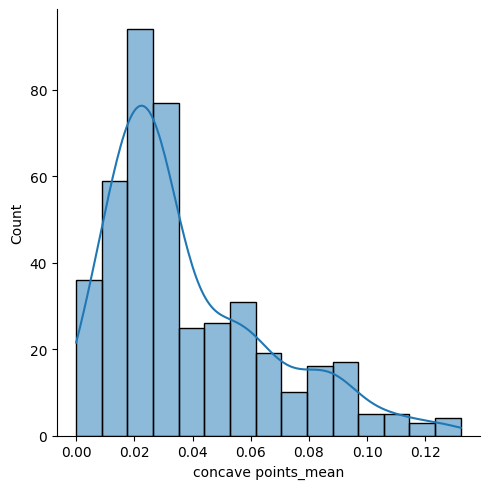

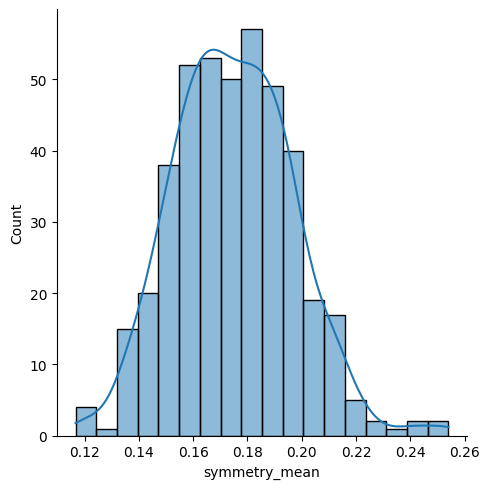

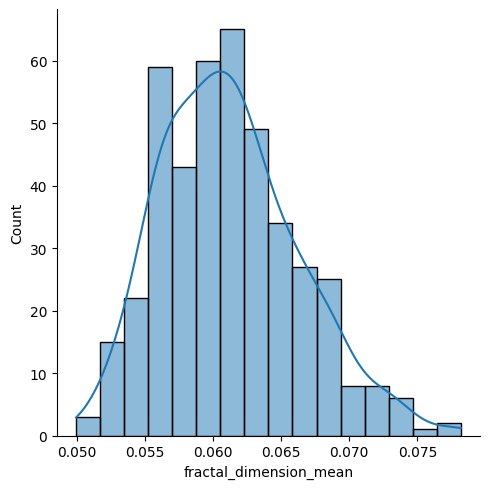

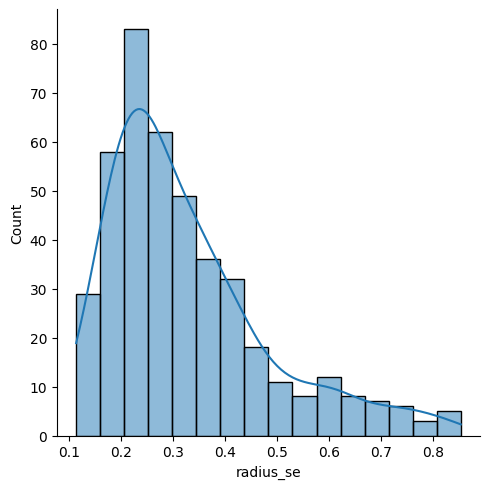

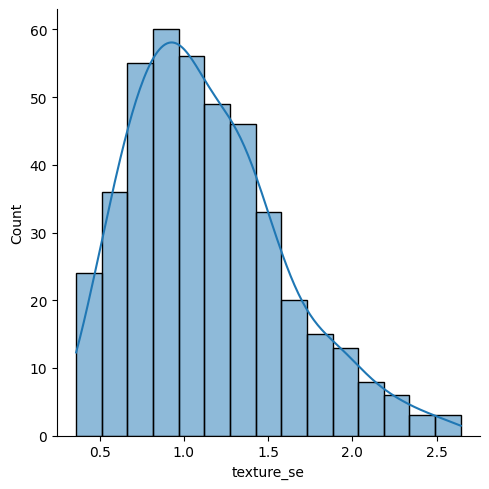

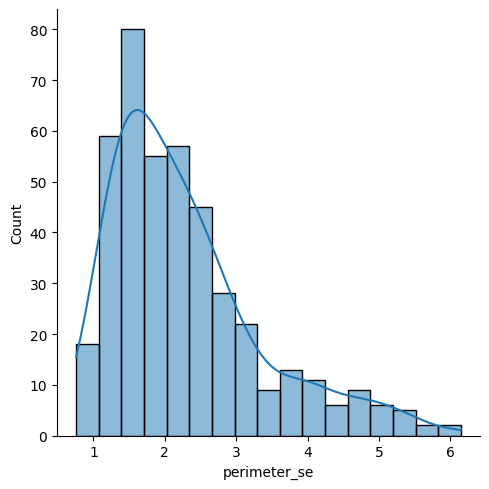

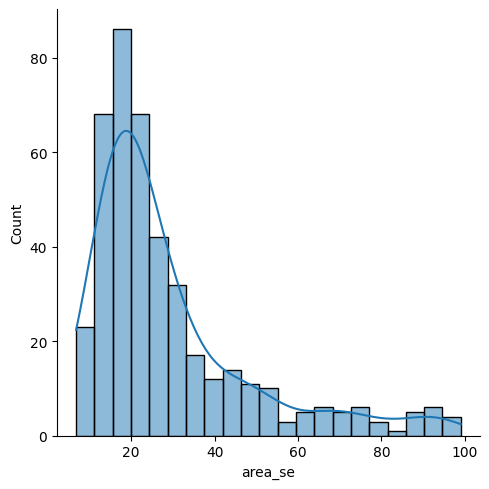

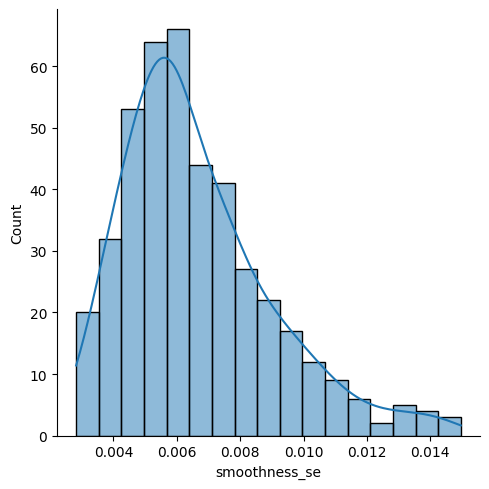

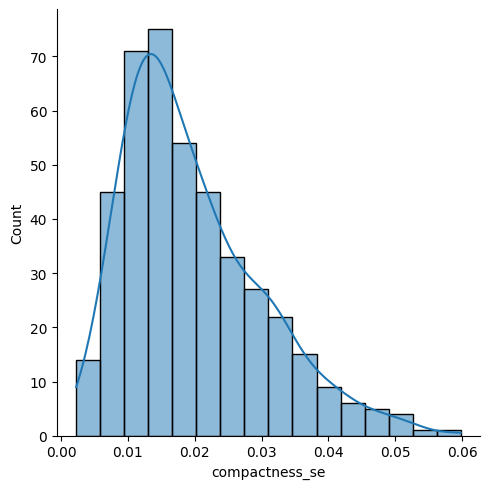

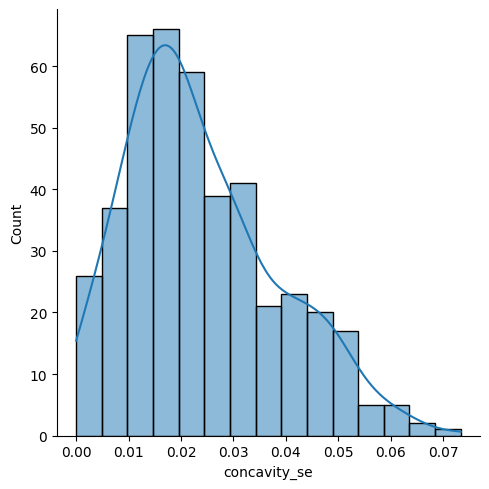

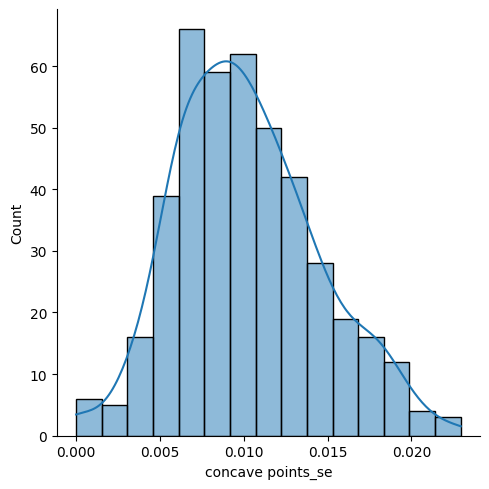

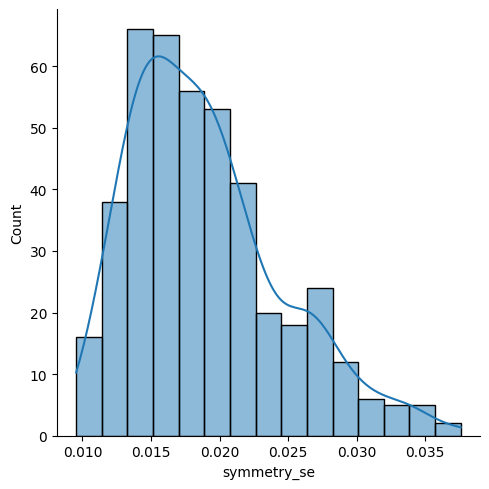

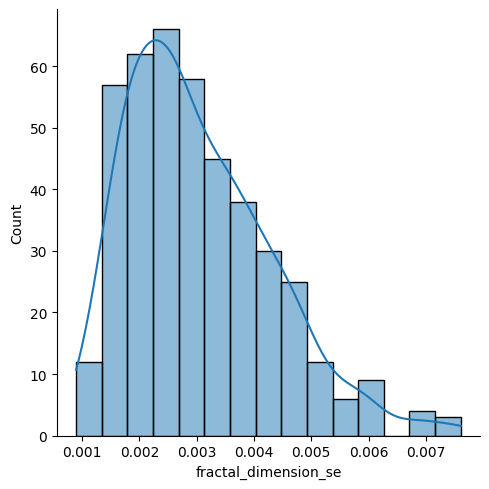

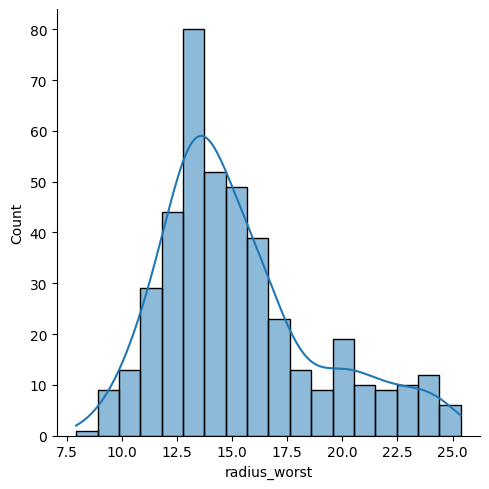

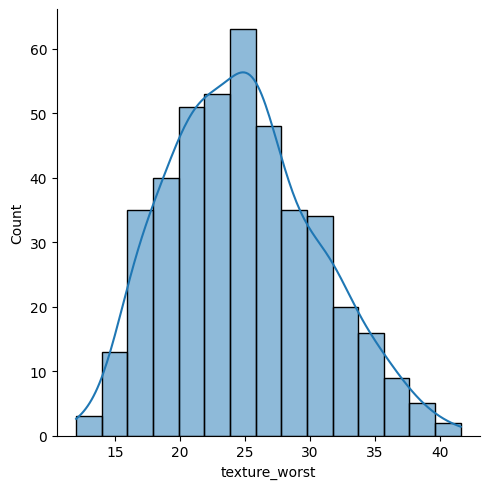

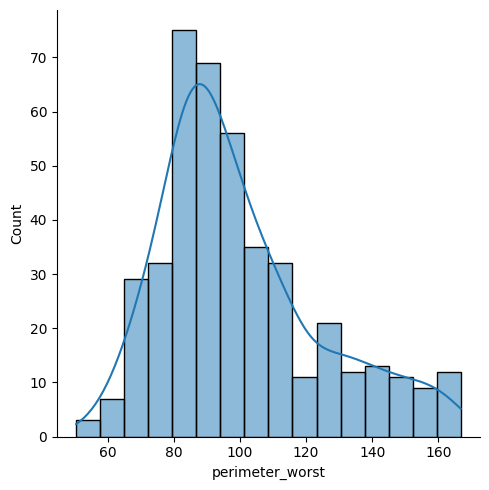

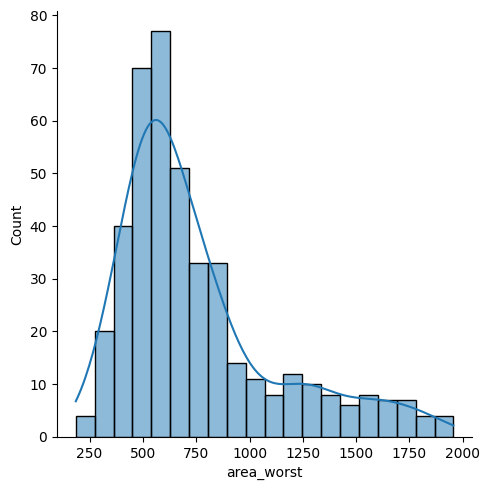

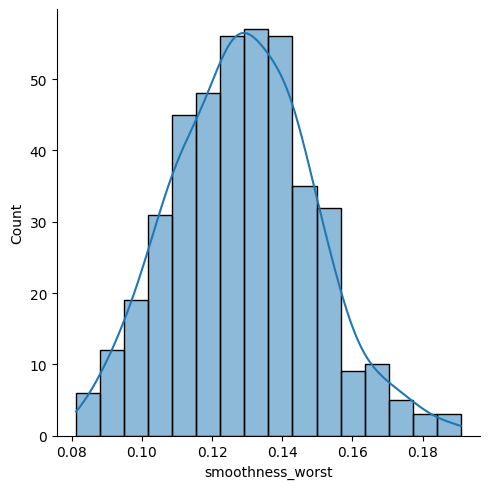

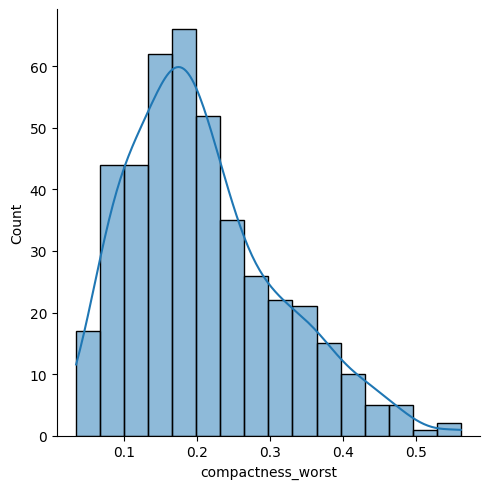

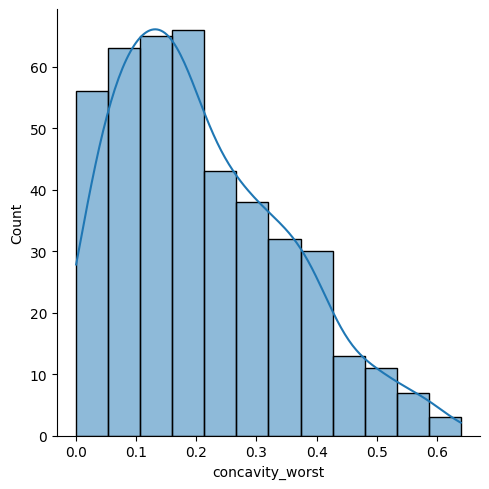

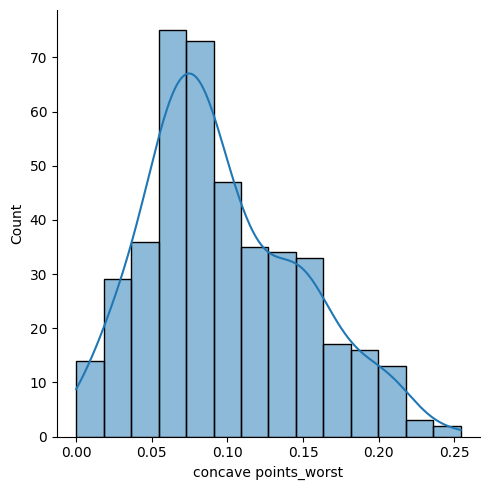

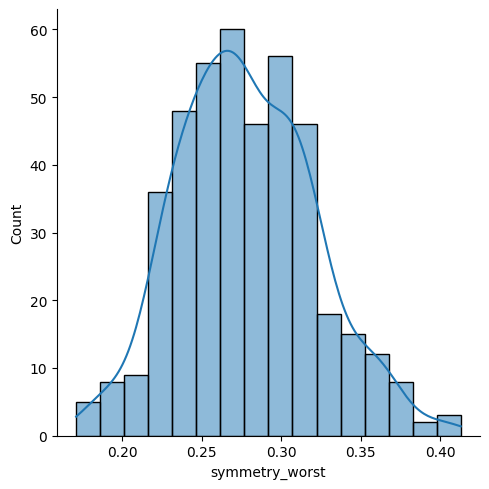

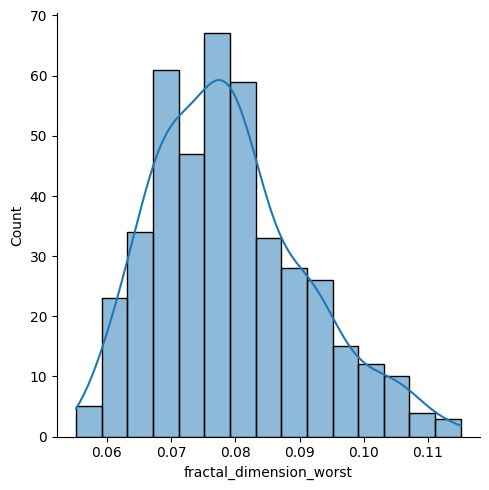

In [240]:
for ele in list_numerical:
    sns.displot(dataset[ele],kde=True)
    plt.show()

* This method worked well when we inspect from the distribution point of view since they generally have low skewness and close to normal distribution.
* However by dropping the outliers with these methods, caused dataset to lose nearly %25.13 of data.
* I think this is a huge loss for the dataset.

### Converting Non-numeric values to Numeric

* We only have one categorical variable which is "diagnosis" so I won't use a for loop.

In [241]:
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,...,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,13.519822,18.594778,87.363021,586.938407,0.093941,0.086810,0.062108,0.037804,0.174981,0.061224,...,15.276829,24.808290,99.807939,753.006323,0.128976,0.207168,0.209125,0.097371,0.278044,0.079029
std,2.746168,3.926129,18.622502,251.365868,0.012244,0.034808,0.050773,0.027837,0.021885,0.005053,...,3.569692,5.652044,24.268222,372.056673,0.019843,0.101980,0.141360,0.051527,0.042935,0.011726
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.171200,0.055210
25%,11.665000,15.790000,74.720000,416.700000,0.084790,0.059735,0.025590,0.018690,0.159600,0.057250,...,12.975000,20.535000,83.715000,513.500000,0.114350,0.134800,0.097890,0.061315,0.247200,0.070210
50%,13.030000,18.240000,84.070000,520.200000,0.093450,0.079520,0.045680,0.028640,0.173500,0.060820,...,14.380000,24.640000,93.850000,630.500000,0.128900,0.188000,0.181000,0.085420,0.274700,0.077730
75%,14.835000,20.975000,96.170000,674.650000,0.102300,0.109950,0.086975,0.053725,0.189400,0.064160,...,16.765000,28.455000,112.000000,861.750000,0.141850,0.263900,0.307000,0.133700,0.306400,0.085510
max,21.370000,30.720000,141.300000,1386.000000,0.129100,0.202200,0.254500,0.132200,0.254000,0.078180,...,25.370000,41.610000,166.800000,1956.000000,0.190900,0.560900,0.639900,0.254300,0.412800,0.115100


In [242]:
# Converting categorical features to numerical features

dataset['target'] = dataset['diagnosis'].apply(lambda x: 1 if x=='M' else 0)
dataset.drop('diagnosis', axis=1, inplace=True)
"""
df_wo_outlier['target'] = df_wo_outlier['diagnosis'].apply(lambda x: 1 if x=='M' else 0)
df_wo_outlier.drop('diagnosis', axis=1, inplace=True)
"""

"\ndf_wo_outlier['target'] = df_wo_outlier['diagnosis'].apply(lambda x: 1 if x=='M' else 0)\ndf_wo_outlier.drop('diagnosis', axis=1, inplace=True)\n"

In [243]:
dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
4,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1
6,18.25,19.98,119.6,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,1
7,13.71,20.83,90.2,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,1


### Normalization

* Normalization is done due to the bias - variance tradeoff in machine learning. 

When the ranges between numerical values differ well, we compress their values between a fixed range of values like 0-10 or 0-1 (generally used 0-1). In here, I've chosen my range between 1,2 (1+ (0,1) ) because I didn't just wanna eliminate the minimum values since they would correspond to zero. 

Let's think of the famous Logistic Regression where we use 1/(1+ e^(b0 + x1*b1 ...)) ; if we do not normalize our values then our b coefficients will be affected negatively. 

Hence our model will have a bias towards to the feature which takes greater numbers than others.
We do not want that to happen to we basically map our values to a different range.

The reason I've mentioned about bias-variance tradeoff is because if we do not apply normalization , then our model cannot express our original data which we call it as low variance.

In [244]:
for ele in list_numerical:
    minVal = dataset[ele].min()
    maxVal = dataset[ele].max()
    dataset[ele] = dataset[ele].apply(lambda x: (x-minVal)/(maxVal-minVal)+1)

Dataset :  29


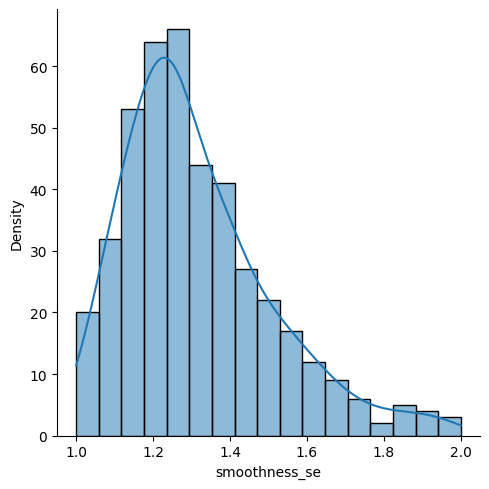

In [245]:

print("Dataset : ",i)
sns.displot(dataset["smoothness_se"],kde=True)
plt.xlabel("smoothness_se")
plt.ylabel("Density")
plt.show()

In [246]:
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,...,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,1.454432,1.422883,1.446857,1.356892,1.472002,1.368832,1.244038,1.285962,1.424476,1.399147,...,1.432183,1.424417,1.320650,1.435258,1.328246,1.326809,1.382899,1.442233,1.397716,0.264637
std,0.190852,0.186870,0.190980,0.202307,0.183865,0.190393,0.199502,0.210566,0.159395,0.179057,...,0.191012,0.208508,0.210107,0.180968,0.193665,0.220910,0.202624,0.177713,0.195799,0.441657
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.325526,1.289386,1.317198,1.219879,1.334585,1.220736,1.100550,1.141377,1.312454,1.258327,...,1.287766,1.286150,1.185396,1.301870,1.190816,1.152977,1.241113,1.314570,1.250459,0.000000
50%,1.420391,1.405997,1.413086,1.303179,1.464634,1.328957,1.179489,1.216641,1.413693,1.384833,...,1.426495,1.373228,1.251468,1.434565,1.291845,1.282857,1.335902,1.428394,1.376023,0.000000
75%,1.545834,1.536173,1.537176,1.427485,1.597537,1.495405,1.341749,1.406392,1.529497,1.503189,...,1.555424,1.529169,1.382059,1.552668,1.435983,1.479762,1.525757,1.559603,1.505928,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


## 2. Data Visualization

Visualize the data to understand it better:
- Correlation heatmap
- Distribution plots for at least 3 features


### Plotting the correlation matrix...

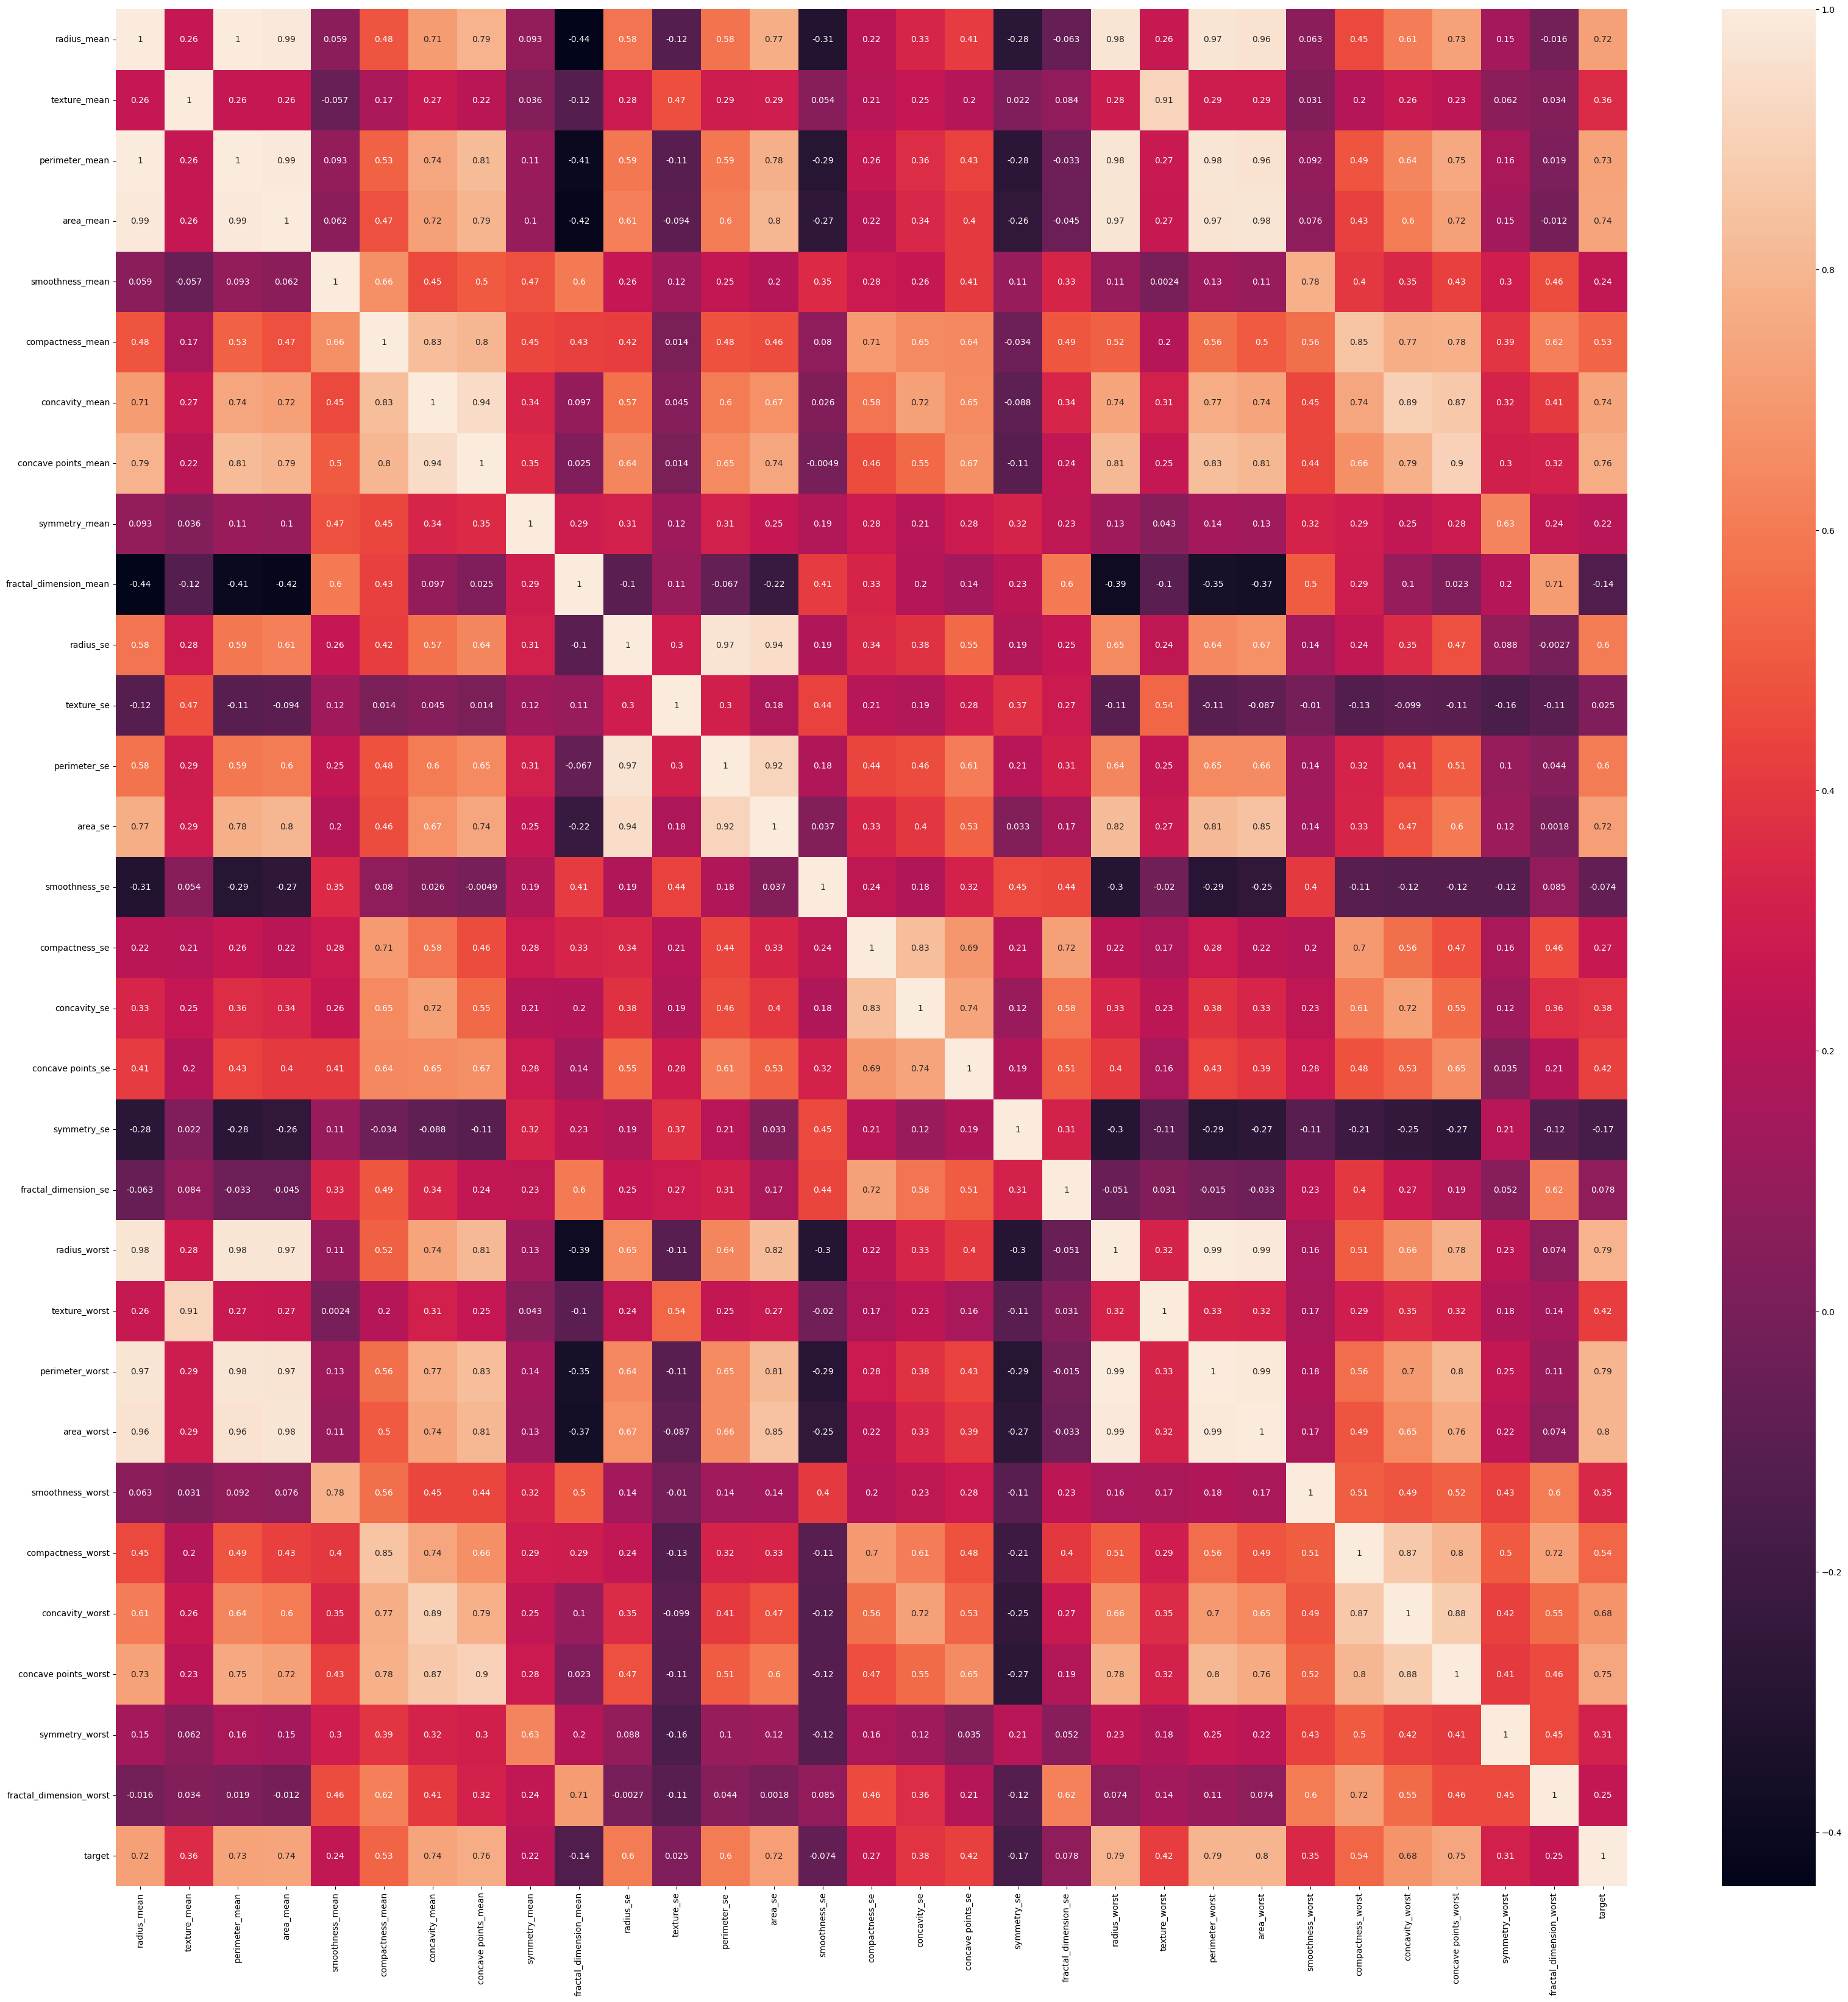

In [247]:
plt.figsize=(50,50)
fig , ax = plt.subplots(figsize=(40,40))
sns.heatmap(dataset.corr(),annot=True,ax=ax)
plt.show()

### Distribution Plotting

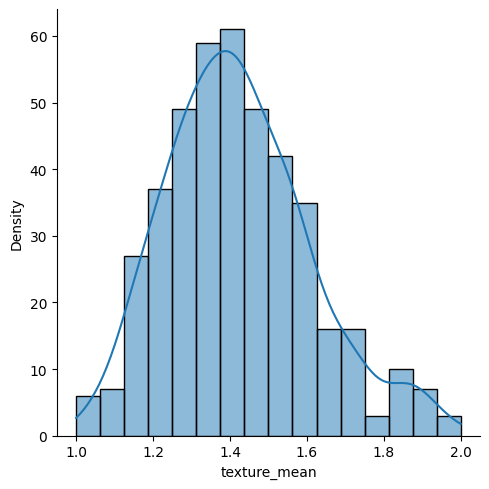

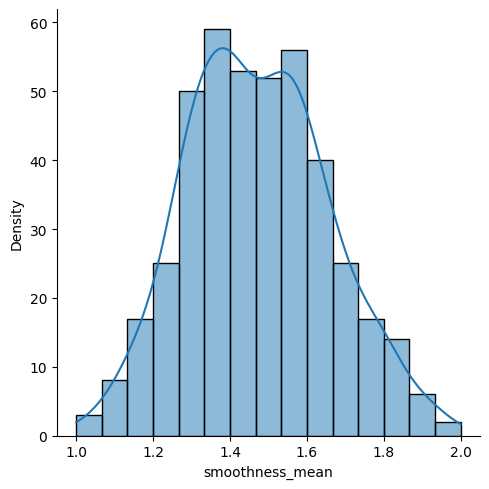

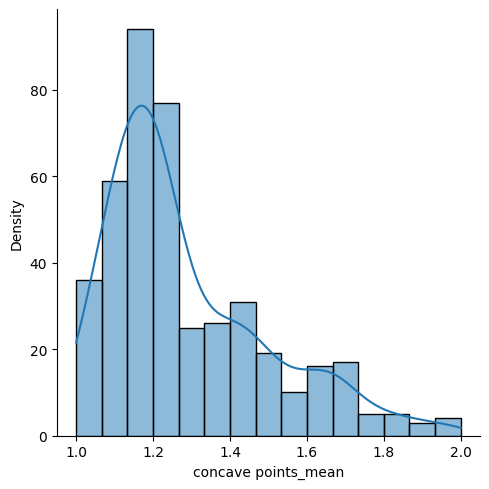

In [248]:

    
for i in [1,4,7]:
    sns.displot(dataset[list_numerical[i]],kde=True)
    plt.xlabel(list_numerical[i])
    plt.ylabel("Density")
    plt.show()

    

## 3. Data Splitting

Manually split the data into training and testing sets in a 70:30 ratio:
- Shuffle and split the data
- Avoid using predefined functions like train_test_split for this task


In [249]:
def custom_tts(data,test_size,target,r_s=42,shuffle=True,balance=True):
    pos_data=[]
    neg_data=[]
    pos_data = data.loc[data[target]==1]
    neg_data = data.loc[data[target]==0]


    if balance:
        random.seed(r_s)
        if len(pos_data) > len(neg_data):
            pos_data = pos_data.sample(n=len(neg_data),random_state=r_s)
        else:
            neg_data = neg_data.sample(n=len(pos_data),random_state=r_s)

    data = pandas.concat([pos_data,neg_data])    

    if shuffle:
        data = data.sample(frac=1,random_state=r_s).reset_index(drop=True)

    train_data = data.iloc[:int((1-test_size)*len(data)),:]
    test_data = data.iloc[int((1-test_size)*len(data)):,:]

    trainx = train_data.drop(target,axis=1)
    trainy = train_data[target]
    testx = test_data.drop(target,axis=1)
    testy = test_data[target]
    
    return trainx,trainy,testx,testy    

## 4. Model Building

### 4.1. kNN Classifier

- Build and train the kNN model
- Choose the optimal k value using Minkowski distance with at least two different values for p 

In [250]:
trainx,trainy,testx,testy = custom_tts(dataset,0.3,'target',48,shuffle=True,balance=True)

Function that returns the eval. metrics of the classification :

In [251]:
def runKNN(trainx,trainy,testx,testy,k,metric='minkowski',p=2):
    #from sklearn.neighbors import KNeighborsClassifier
    
    knn = KNeighborsClassifier(n_neighbors=k,metric=metric,p=p)
    knn.fit(trainx,trainy)
    y_pred = knn.predict(testx)

    return y_pred,knn

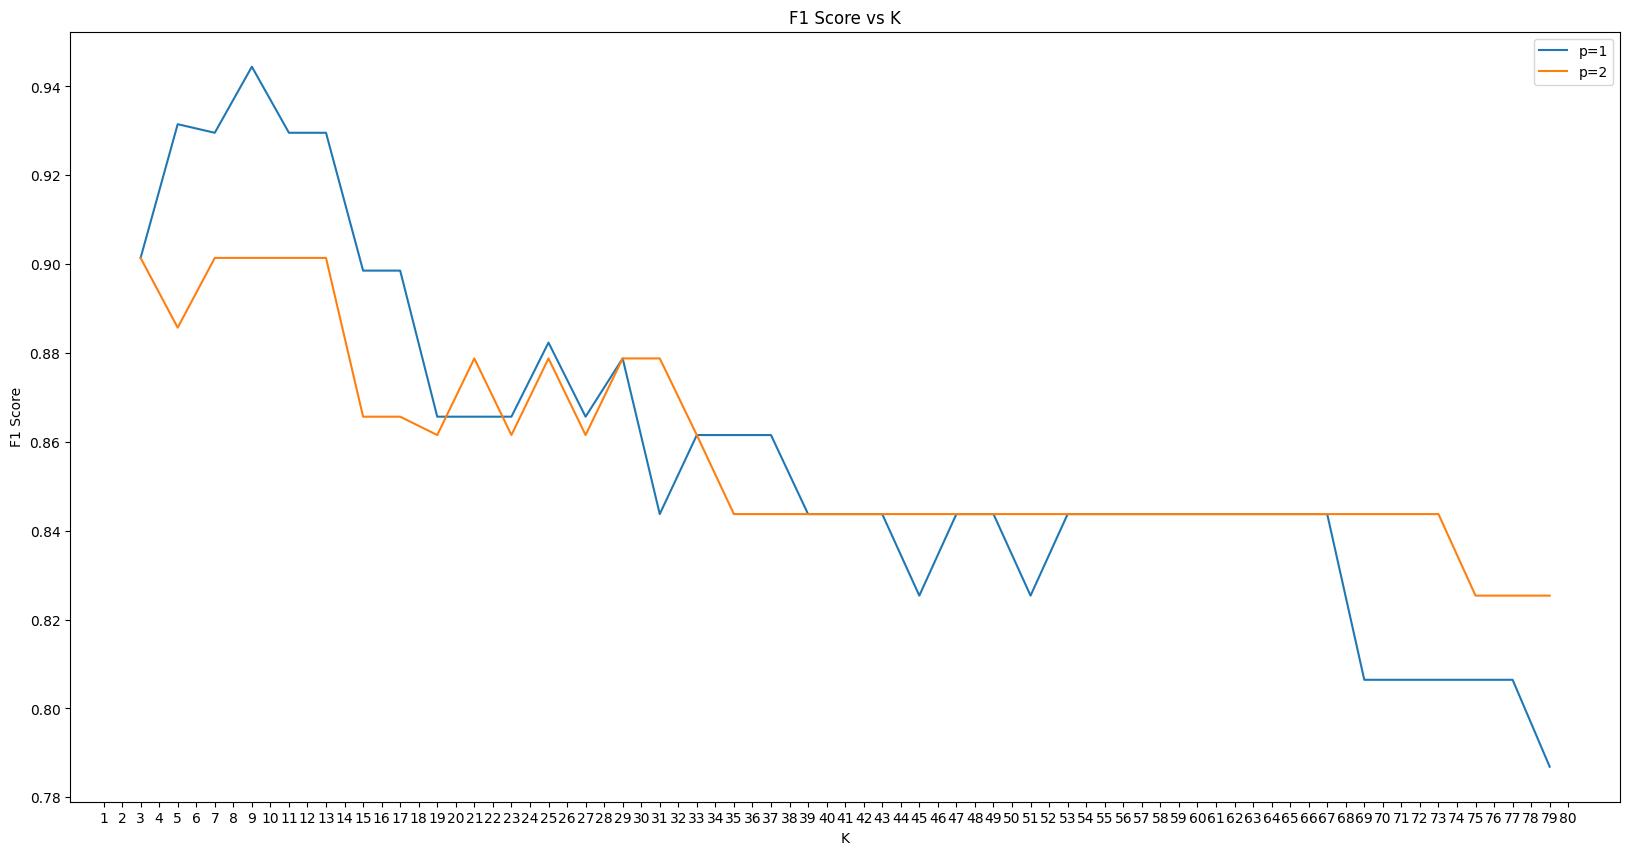

Maximum F1 Score for KNN with p=1 :  0.9444444444444445
Maximum F1 Score for KNN with p=2 :  0.9014084507042254
Best K for KNN with p=1 :  9
Best K for KNN with p=2 :  3
Best K for KNN :  9
Best p for KNN :  2


In [252]:
k_max = int(np.sqrt(len(dataset)))*4
    # k_max is selected as 4 multiplied by the square root of the number of samples in the dataset
    # I have multiplied it with 4 because i wanted to see the effect of k on the metrics

f1_scores_knn_1 = []
f1_scores_knn_2 = []

for i in range(3,k_max+1,2):
    y_pred,knn = runKNN(trainx,trainy,testx,testy,i,'minkowski',2)
    f1_scores_knn_1.append(f1_score(testy,y_pred))

    y_pred,knn = runKNN(trainx,trainy,testx,testy,i,'minkowski',1)
    f1_scores_knn_2.append(f1_score(testy,y_pred))

plt.figure(figsize=(20,10))
plt.plot(range(3,k_max+1,2),f1_scores_knn_1)
plt.plot(range(3,k_max+1,2),f1_scores_knn_2)
plt.xlabel("K")
plt.ylabel("F1 Score")
plt.title("F1 Score vs K")
plt.xticks(range(1,k_max+1))
plt.legend(["p=1","p=2"])
plt.xticks(rotation=0)

plt.show()

print("Maximum F1 Score for KNN with p=1 : ",max(f1_scores_knn_1))
print("Maximum F1 Score for KNN with p=2 : ",max(f1_scores_knn_2))

print("Best K for KNN with p=1 : ",f1_scores_knn_1.index(max(f1_scores_knn_1))*2+3)
print("Best K for KNN with p=2 : ",f1_scores_knn_2.index(max(f1_scores_knn_2))*2+3)

k_best = 0
p_best_a = 0

if max(f1_scores_knn_1) > max(f1_scores_knn_2):
    k_best = f1_scores_knn_1.index(max(f1_scores_knn_1))*2+3
    p_best_a = 2
else:
    k_best = f1_scores_knn_2.index(max(f1_scores_knn_2))*2+3
    p_best_a = 1
    

print("Best K for KNN : ",k_best)
print("Best p for KNN : ",p_best_a)



* Based on the results we have chose the best k and p values.

In [253]:
print("Best K for KNN : ",k_best)
print("Best p for KNN : ",p_best_a)

Best K for KNN :  9
Best p for KNN :  2


In [254]:
knn_best = KNeighborsClassifier(n_neighbors=k_best,metric='minkowski',p=p_best_a)

knn_best.fit(trainx,trainy)
knn_pred = knn_best.predict(testx)
print(classification_report(testy,knn_pred))
print(f1_score(testy,knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        31
           1       0.97      0.92      0.94        37

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68

0.9444444444444445


In [255]:
f1_score_knn = f1_score(testy,knn_pred)
print("F1 Score for KNN : ",f1_score_knn)

F1 Score for KNN :  0.9444444444444445


### 4.2. Logistic Regression

- Build and train the Logistic Regression model

In [256]:
def runLR(trainx,trainy,testx,testy,solver='lbfgs',max_iter=1000):
    #from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(solver=solver,max_iter=max_iter)
    lr.fit(trainx,trainy)
    y_pred = lr.predict(testx)
    return y_pred,lr

In [257]:
for ele in ['newton-cg','lbfgs','liblinear','sag','saga']:
    y_pred,lr = runLR(trainx,trainy,testx,testy,ele,100000)
    print("Solver : ",ele)
    print(classification_report(testy,y_pred))
    print("")
    print("F1 Score : ",f1_score(testy,y_pred))

Solver :  newton-cg
              precision    recall  f1-score   support

           0       0.83      0.97      0.90        31
           1       0.97      0.84      0.90        37

    accuracy                           0.90        68
   macro avg       0.90      0.90      0.90        68
weighted avg       0.91      0.90      0.90        68


F1 Score :  0.8985507246376812
Solver :  lbfgs
              precision    recall  f1-score   support

           0       0.83      0.97      0.90        31
           1       0.97      0.84      0.90        37

    accuracy                           0.90        68
   macro avg       0.90      0.90      0.90        68
weighted avg       0.91      0.90      0.90        68


F1 Score :  0.8985507246376812
Solver :  liblinear
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        31
           1       0.94      0.81      0.87        37

    accuracy                           0.87        68
   macro

* The logistic regression gave the best results with the default parameters which is saga solver and l2 penalty.

In [258]:
lr_best = LogisticRegression(solver='saga',max_iter=100000)
lr_best.fit(trainx,trainy)
lr_pred = lr_best.predict(testx)
print(classification_report(testy,lr_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        31
           1       0.97      0.89      0.93        37

    accuracy                           0.93        68
   macro avg       0.93      0.93      0.93        68
weighted avg       0.93      0.93      0.93        68



## 5. Model Evaluation

### 5.1. Confusion Matrix

Analysis of the confusion matrices for both models:
- Plot and interpret the confusion matrices
- Display accuracy, precision, recall, and F1-score for both models

In [259]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [260]:
print("F1 Score for KNN : ",f1_score(testy,knn_pred))
print("F1 Score for LR : ",f1_score(testy,lr_pred))

print("Accuracy Score for KNN : ",accuracy_score(testy,knn_pred))
print("Accuracy Score for LR : ",accuracy_score(testy,lr_pred))

print("Recall Score for KNN : ",recall_score(testy,knn_pred))
print("Recall Score for LR : ",recall_score(testy,lr_pred))

print("Precision Score for KNN : ",precision_score(testy,knn_pred))
print("Precision Score for LR : ",precision_score(testy,lr_pred))


print("Confusion Matrix for KNN :")
print(confusion_matrix(testy,knn_pred))

print("Confusion Matrix for LR :")
print(confusion_matrix(testy,lr_pred))



F1 Score for KNN :  0.9444444444444445
F1 Score for LR :  0.9295774647887325
Accuracy Score for KNN :  0.9411764705882353
Accuracy Score for LR :  0.9264705882352942
Recall Score for KNN :  0.918918918918919
Recall Score for LR :  0.8918918918918919
Precision Score for KNN :  0.9714285714285714
Precision Score for LR :  0.9705882352941176
Confusion Matrix for KNN :
[[30  1]
 [ 3 34]]
Confusion Matrix for LR :
[[30  1]
 [ 4 33]]


### Evaluation Metrics

Confusion Matrix:

| | Predicted: 0 | Predicted: 1 |
| --- | --- | --- |
| Actual: 0 | TN | FP |
| Actual: 1 | FN | TP |




* Accuracy : (TP + TN) / (TP + TN + FP + FN)
* Presicion : TP/(TP + FP)
* Recall : TP/(TP + FN)
* F1 Score : 2 * (Precision * Recall) / (Precision + Recall)


* As you can see there is not much difference between the models.

* When we check the confusion matrix we can see that the knn model has more false positive and false negative values than the logistic regression model.

* Since our confusion matrix of KNN has more False Negative (predicted as 0 but actually 1) than Logistic Regression, we can say that KNN is more sensitive to False Negative values than Logistic Regression. (Recall of KNN is lower than Logistic Regression)

* We can see a similar difference between accuracy and precision values.

* In the end Logistic Regression has better results than KNN.


### 5.2. Precision-Recall Curves

Evaluate the Precision-Recall curves for both models:
- Plot and analyze the curves

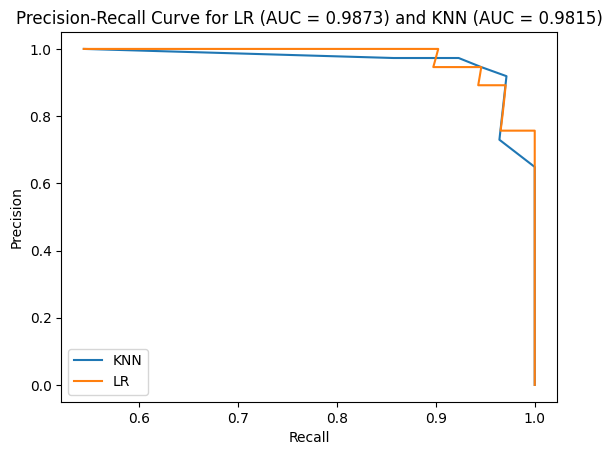

In [261]:
# plot the presicion and recall curve 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

lr_probs = lr_best.predict_proba(testx)
lr_probs = lr_probs[:, 1]

knn_probs = knn_best.predict_proba(testx)
knn_probs = knn_probs[:, 1]


precision_lr, recall_lr, thresholds_lr = precision_recall_curve(testy, lr_probs)
auc_lr = auc(recall_lr, precision_lr)

precision_knn, recall_knn, thresholds_knn = precision_recall_curve(testy, knn_probs)
auc_knn = auc(recall_knn, precision_knn)


plt.plot(precision_knn, recall_knn)
plt.plot(precision_lr, recall_lr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for LR (AUC = %0.4f) and KNN (AUC = %0.4f)' % (auc_lr, auc_knn))
plt.legend(["KNN","LR"])
plt.show()

* As you can see from the graph above , the precision-recall curve of logistic regression is better than the knn model.
* Because in presicion-recall curve , we want to have a high precision and recall values.
* We can calculate the area under the curve and compare the models.

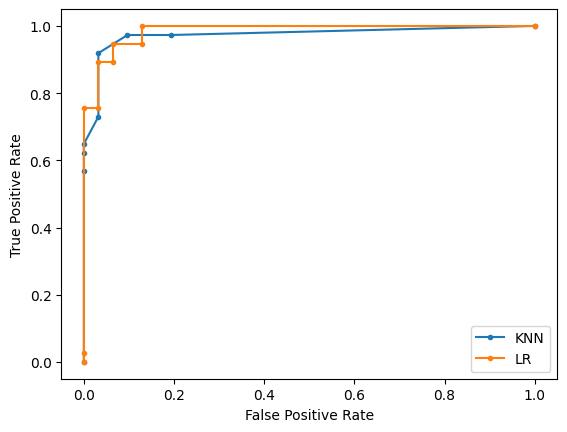

In [262]:
# plot the roc curve for the model
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

knn_probs = knn_best.predict_proba(testx)
knn_probs = knn_probs[:, 1]

lr_probs = lr_best.predict_proba(testx)
lr_probs = lr_probs[:, 1]

knn_fpr, knn_tpr, _ = roc_curve(testy, knn_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
plt.plot(lr_fpr, lr_tpr, marker='.', label='LR')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()


* Here you can see the ROC curve of the models.
* We obtain the same result in Presicion-Recall curve.

### 5.3. Choose an appropriate metric to evaulate the models. Compare the models and discuss why you chose the metric.

* First things first I will use F1 Score for comparison between models.

Because F1 Score considers both Recall and Presicion which are generally more informative together than accuracy. Indeed for this dataset and models, we can inspect the difference of classifications directly by checking the presicion and recall of classifications.

We can use accuracy too , but it may not represent detailed information about the model.


In [278]:
print("F1 Score for KNN : ",f1_score(testy,knn_pred))
print("F1 Score for LR : ",f1_score(testy,lr_pred))

print("Accuracy Score for KNN : ",accuracy_score(testy,knn_pred))
print("Accuracy Score for LR : ",accuracy_score(testy,lr_pred))


F1 Score for KNN :  0.9444444444444445
F1 Score for LR :  0.9295774647887325
Accuracy Score for KNN :  0.9411764705882353
Accuracy Score for LR :  0.9264705882352942


Accuracy wouldn't be a good metric for this dataset since we have a class imbalance problem at the raw data.

Since we equally care about both classes (equalizing the balances of classes) while splitting the data into testing and training sets, we can use accuracy as a metric.

* As you can see from the results above , the logistic regression model has worse results than the knn model.
* Thus I choose the knn model as the best model for this dataset.

## Improvements to do

* KFoldCrossValidation can be used to improve the model.
* We can use more different distance metrics.
* We can handle the outliers in a different way.
* We can use different normalization methods.